In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
from matplotlib import font_manager, rc
import platform
import math
import operator
from IPython.display import HTML, display
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

# Preprocessing

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
drug = pd.read_csv("drug_consumption.csv")

In [5]:
# ID 열 삭제

drug = drug.drop(['ID'], axis=1)

In [6]:
# 결측치 확인

drug.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [7]:
# 중복행 확인

drug.duplicated().sum()

0

In [8]:
# Semeron 약물 (가짜약물)에 CL0이 아니라 다른 거 답한 사람들 제거 (over-claimed) => 8명 제거

idx = drug[drug['Semer'] != 'CL0'].index
drug = drug.drop(idx)
drug = drug.drop(['Semer'], axis=1)

In [9]:
drug

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


In [10]:
def plot_density(dataset, col, ax, plot_gaussian = True, color="Blue"):
    '''
    Extension of the seaborn histogram that plots, for a given column, an estimated normal distribution (if requested) on top of the fitted data distribution.
    '''
    ncount = len(dataset)
    
    if plot_gaussian:
        std = dataset[col].std()
        mean = dataset[col].mean()
    
    #plot histogram using seaborn
    ax = sns.histplot(dataset[col], ax=ax, color=color, kde=True, stat="probability", kde_kws={"bw_adjust":3})
    
    if plot_gaussian:
        # Limiting our gaussian to the limits from the above plot
        xmin, xmax = ax.get_xlim()
        xnorm = np.arange(xmin, xmax, 0.001)
        ynorm = norm.pdf(xnorm, mean, std)
        ax.plot(xnorm, ynorm, 'r', lw=2)
        ax.legend(["data distribution", "estimated normal distribution"], loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
    
    ax.set_title(col)
    ax.set_xlabel("")

In [11]:
def plot_pie(dataset, col, ax):  
    '''
    Pandas' pie plot wrapper
    '''
    ax = dataset[col].value_counts().plot(kind='pie', ax=ax)
    ax.set_title(col)
    ax.set_ylabel("")

In [12]:
def plot_count(dataset, col, ax, order = None, show_percent=True, rotate_label = True, add_args={"palette": "Set2"}):
    '''
    Extending the seaorn countplot to get frequencies and counts in a pretty way. 
    '''
    
    ncount = len(dataset)
    
    if order is None:
        order = np.sort(dataset[col].unique())
    
    # plot seaborn countplot
    ax = sns.countplot(data=dataset, x=col, ax=ax, order=order, **add_args)
    
    # Get y limit (number of elements)
    _ ,max_nb = ax.get_ylim()
    # Transform this limit into a frequency in [0, 100]
    freq_lim = (max_nb * 100/ ncount)
    
    # Duplicate the ax
    ax2 = ax.twinx()
    
    #Move duplicate y axis ticks to the left
    ax2.yaxis.tick_left()
    
    #Move original y axis ticks to the right
    ax.yaxis.tick_right()
    
    # Swap the label positions to match the ticks
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # We want to write the frequency on top of each bar
    if show_percent:
        # for every bar
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            if not math.isnan(x.mean()) and not math.isnan(y):
                # Write frequency at an x and y coordinate
                ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount), 
                    ha='center', va='bottom')

    # Set y axis limit for counts and frequencies
    ax2.set_ylim(0,freq_lim)
    ax.set_ylim(0,max_nb)

    # set ticks for count
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax.yaxis.set_tick_params(which="major")

    # set ticks for frequencies
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(freq_lim/10))
    ax2.yaxis.set_tick_params(which="major")

    # remove grid for ax 2 (keep only ax)
    ax2.grid(False)
    ax.grid(False)
    ax.set_xlabel("")
    if rotate_label:
        # rotate tick labels on the x axis / / /
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(col)

In [13]:
def plot(kind, dataset, columns=None, fig_title="Count/Frequency plots", fontsizes = 20, **kwargs):
    '''
    Wrapper function that takes care of plot wise sizes and calling the wanted procedure
    '''
    
    # plot choices
    kind_dict = {
        'pie': plot_pie,
        'count': plot_count,
        'density': plot_density}
    
    if kind not in kind_dict:
        raise ValueError(f"{kind} is not a valid kind, has to be one of {kind_dict.keys()}")
    
    if columns is None:
        # us all dataset columns
        columns = list(dataset.columns)
    
    fig = None
    
    # Setting font sizes
    plt.rc('xtick', labelsize=fontsizes*1.5)
    plt.rc('ytick', labelsize=fontsizes*1.5)
    plt.rc('axes', labelsize=fontsizes*2)
    plt.rc('legend', fontsize=fontsizes*1.5, title_fontsize=0)
    plt.rc('axes', titlesize=2*fontsizes)
    plt.rc('font', size=1.7*fontsizes)
    
    # Scale of the figure in ax (to be used later)
    figsize_scale = fontsizes
    
    if not isinstance(columns, list):
        # columns has to be a list
        if isinstance(columns, str):
            columns = [columns]
        else:
            columns = list(columns)
    
    if len(columns) == 1: # Only variable to plot
        ncols, nrows = 1, 1
        figsize_scale *= 2 # double figsize
    else:
        ncols, nrows = 2, math.ceil(len(columns) / 2)
     
    fig, axes = plt.subplots(figsize=(figsize_scale*ncols, figsize_scale*nrows), nrows=nrows, ncols=ncols)
    
    if ncols == 1 and nrows == 1:
        # We need a list of axes
        axes = np.array([axes])
    
    # Plot
    do_plots(dataset, columns, axes, kind_dict[kind], **kwargs)
    
    fig.suptitle(fig_title + "\n\n", fontsize=fontsizes*2.5)
    plt.tight_layout()
    #Reset plot setting to original
    sns.reset_orig()
    
def do_plots(dataset, columns, axes, plot_func, **kwargs):
    '''
    Calls the plotting function on every axis and removes unused axes.
    '''
    axes = axes.flat
    
    #plot every variable
    for index, col in enumerate(columns):
        plot_func(dataset, col, axes[index], **kwargs)

    # remove empty axes
    for empty in range(len(columns), len(axes)):
        axes[empty].axis("off")

## Binary Classification (2, 5)

In [14]:
x = drug.iloc[:, 0:13]
y = drug.iloc[:, 17]
drug1 = pd.concat([x,y], axis=1)
drug1

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL3
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL6


In [15]:
# 이진 분류

mapping_dict = {'CL0' : 'Non-user',
                'CL1' : 'Non-user',
                'CL2' : 'User',
                'CL3' : 'User',
                'CL4' : 'User',
                'CL5' : 'User',
                'CL6' : 'User'}

for i in range(12,14):
    drug1.iloc[:,i] = drug1.iloc[:,i].apply(lambda x : mapping_dict[x])

In [16]:
drug1

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,User,Non-user
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,User,User
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,User,User
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,User,User
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,User,User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,User,User
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,User,User
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,User,User
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,User,User


<AxesSubplot:>

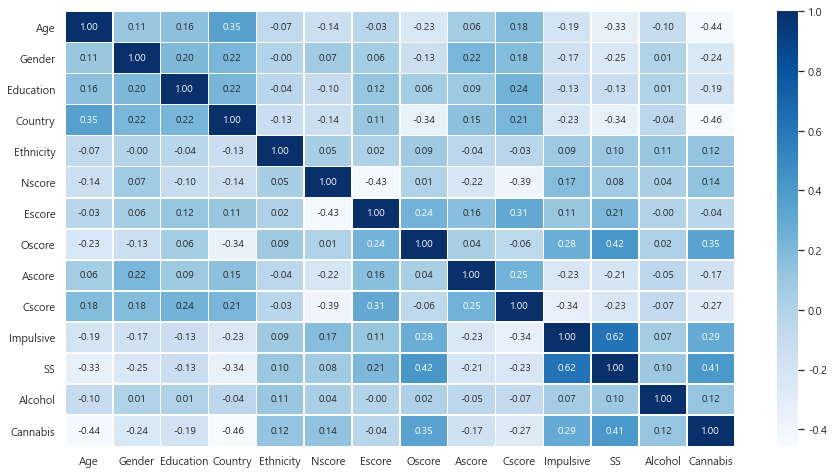

In [17]:
copy1 = drug1.copy()
mapping_dict = {'Non-user' : 0,
                'User' : 1}

for i in range(12,14):
    copy1.iloc[:,i] = copy1.iloc[:,i].apply(lambda x : mapping_dict[x])
plt.figure(figsize=(15,8))
sns.heatmap(data=copy1.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [21]:
age = ['18-24' if a == -0.95197 else 
       '25-34' if a == -0.07854 else 
       '35-44' if a == 0.49788 else  
       '45-54' if a == 1.09449 else  
       '55-64' if a == 1.82213 else  
       '65+' 
       for a in drug1['Age']]



gender = ['Female' if g > 0 else 
			'Male' 
			for g in drug1['Gender']]


education  = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in drug1['Education']]


country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in drug1['Country']]


ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in drug1['Ethnicity']]


drug1['Age'] = age
drug1['Gender'] = gender
drug1['Education'] = education
drug1['Country'] = country
drug1['Ethnicity'] = ethnicity

In [22]:
drug1

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Cannabis
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,User,Non-user
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,User,User
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,User,User
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,User,User
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,User,User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,User,User
1881,18-24,Male,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,User,User
1882,25-34,Female,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,User,User
1883,18-24,Female,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,User,User


### Alcohol

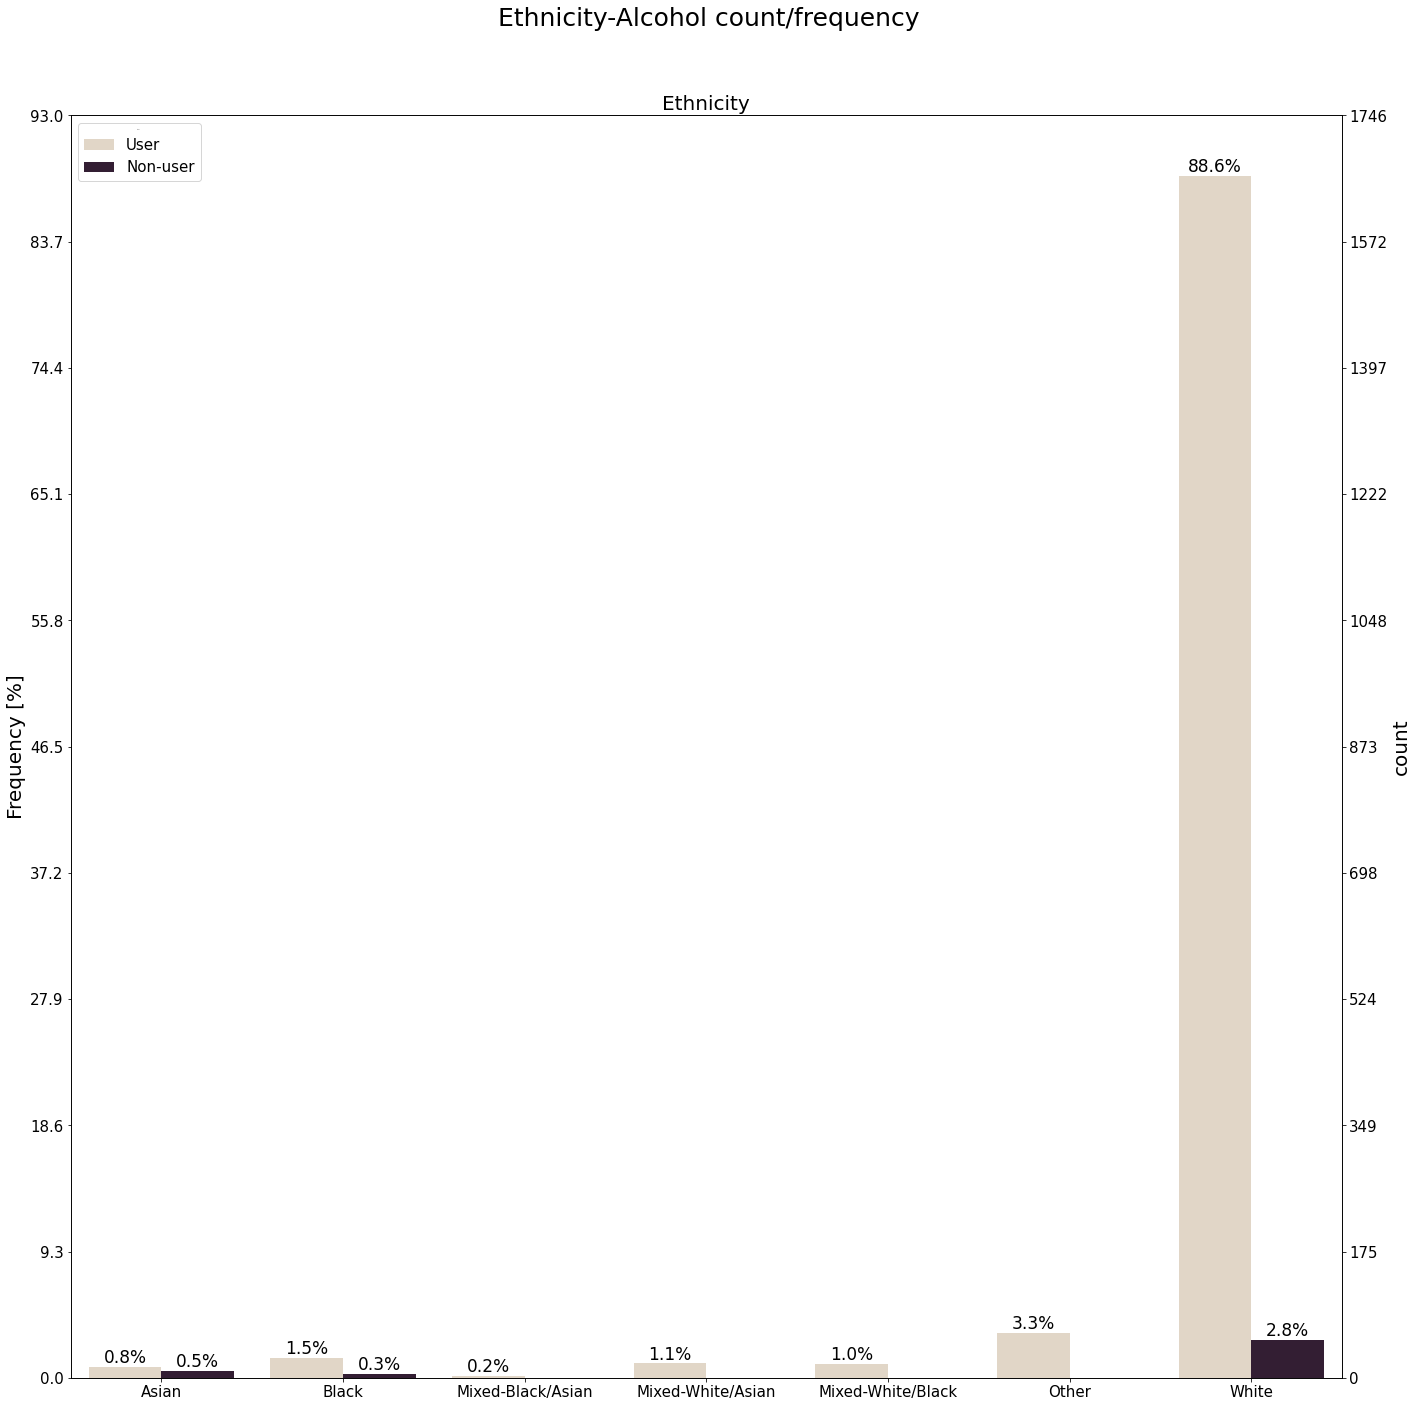

In [31]:
plot("count", drug1, 'Ethnicity', fig_title="Ethnicity-Alcohol count/frequency", rotate_label=False, add_args={"hue":"Alcohol", "palette":'ch:.25'}, fontsizes=10);

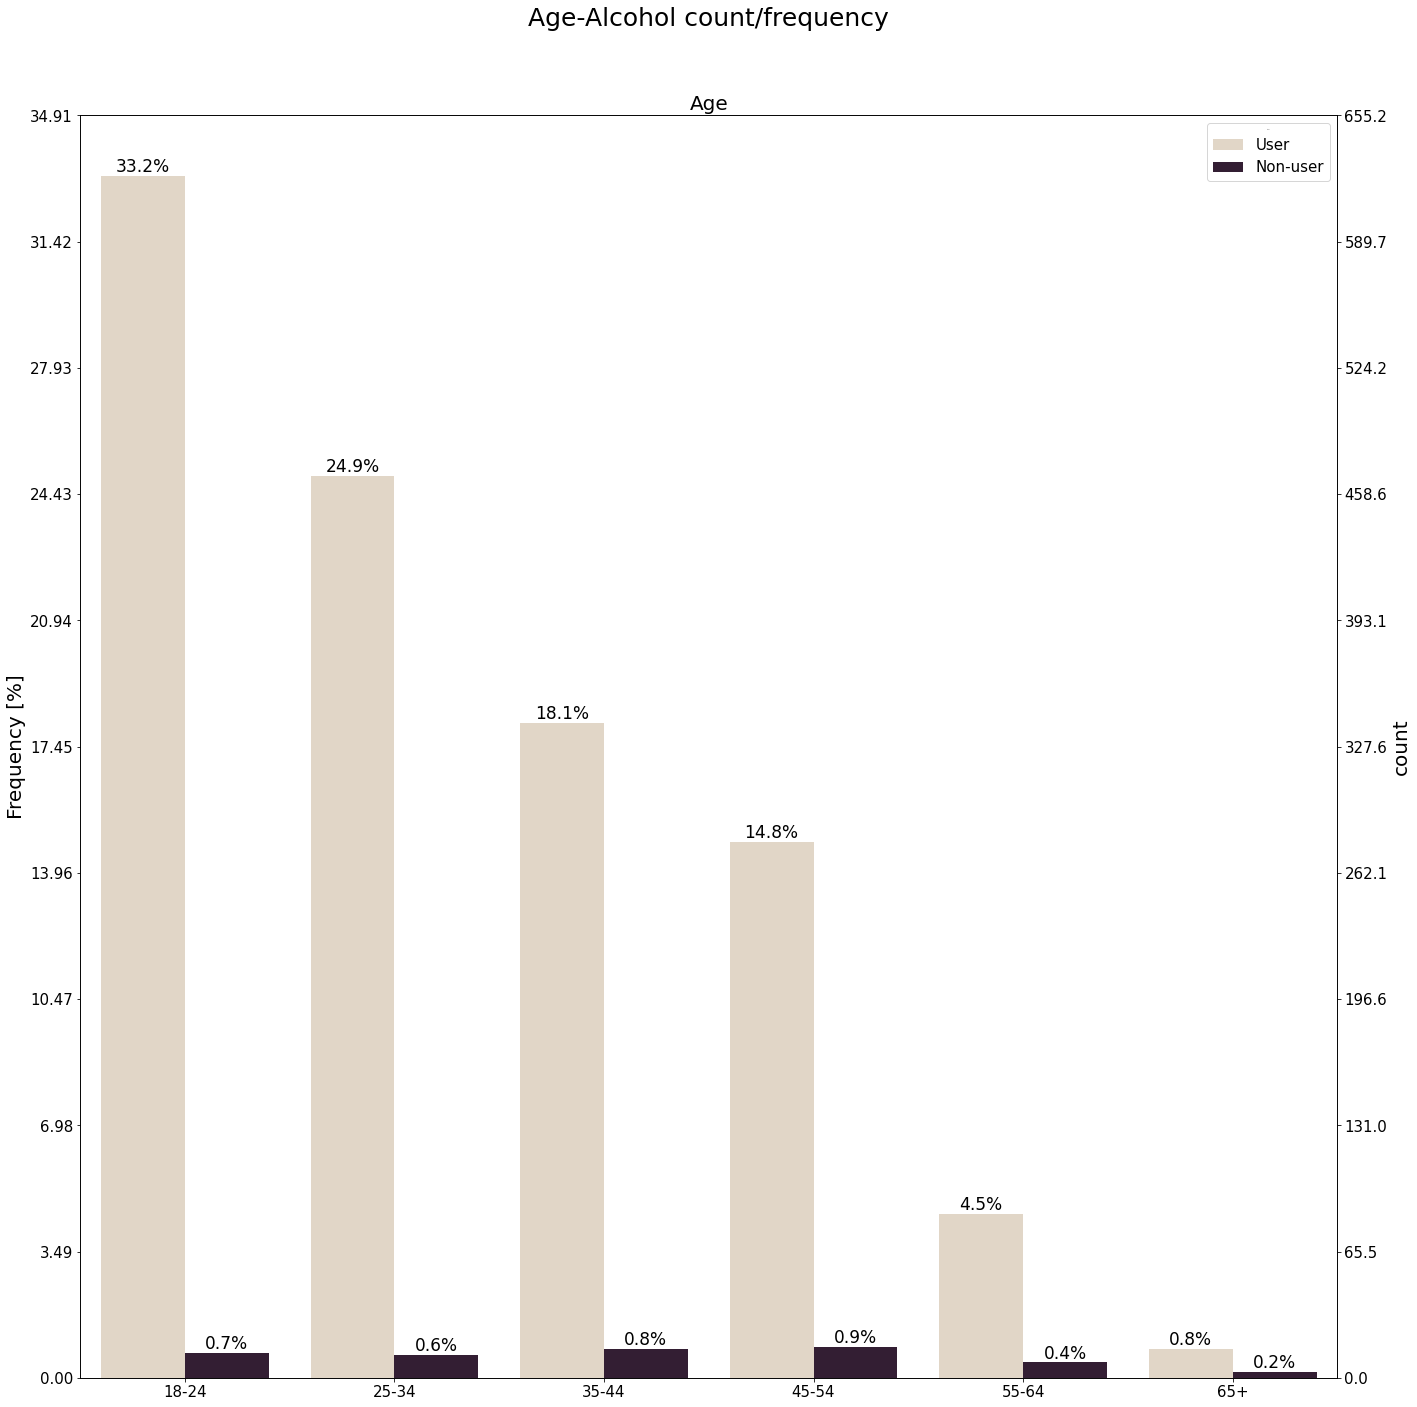

In [26]:
plot("count", drug1, 'Age', fig_title="Age-Alcohol count/frequency", rotate_label=False, add_args={"hue":"Alcohol", "palette":'ch:.25'}, fontsizes=10);

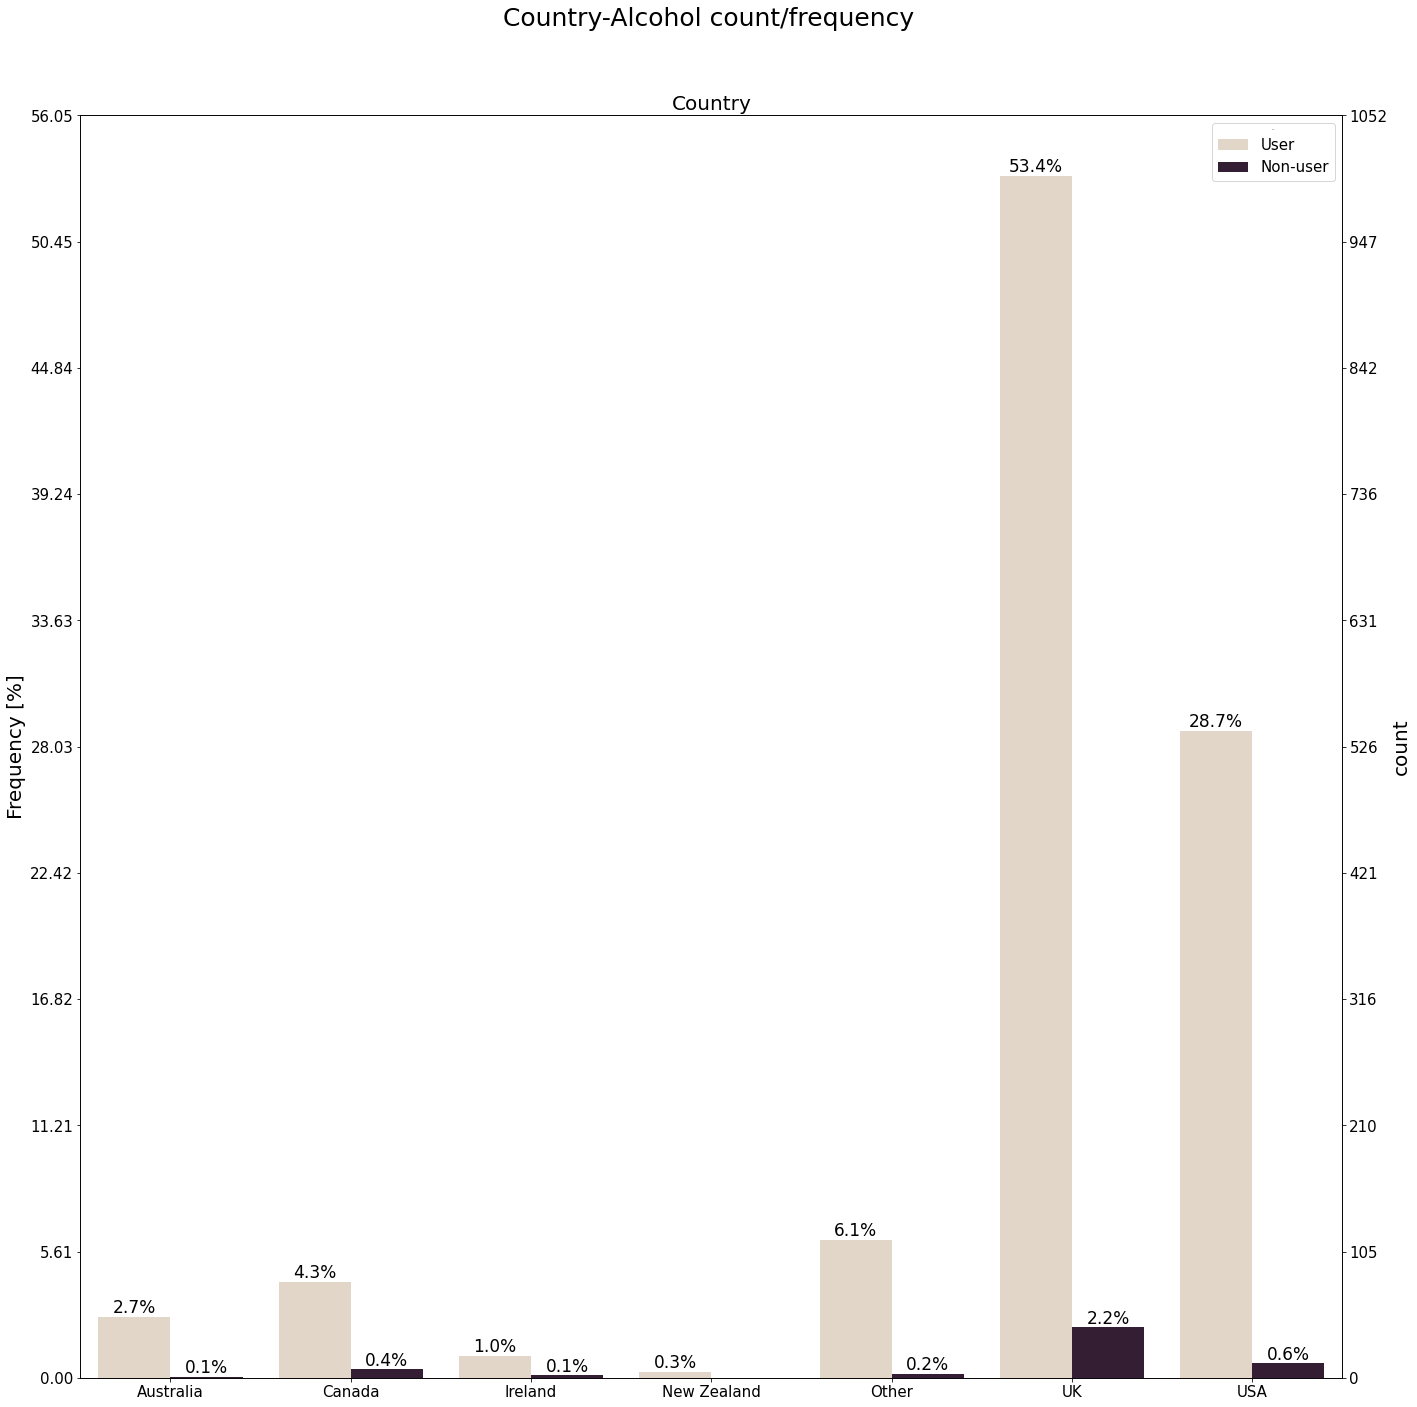

In [27]:
plot("count", drug1, 'Country', fig_title="Country-Alcohol count/frequency", rotate_label=False, add_args={"hue":"Alcohol", "palette":'ch:.25'}, fontsizes=10);

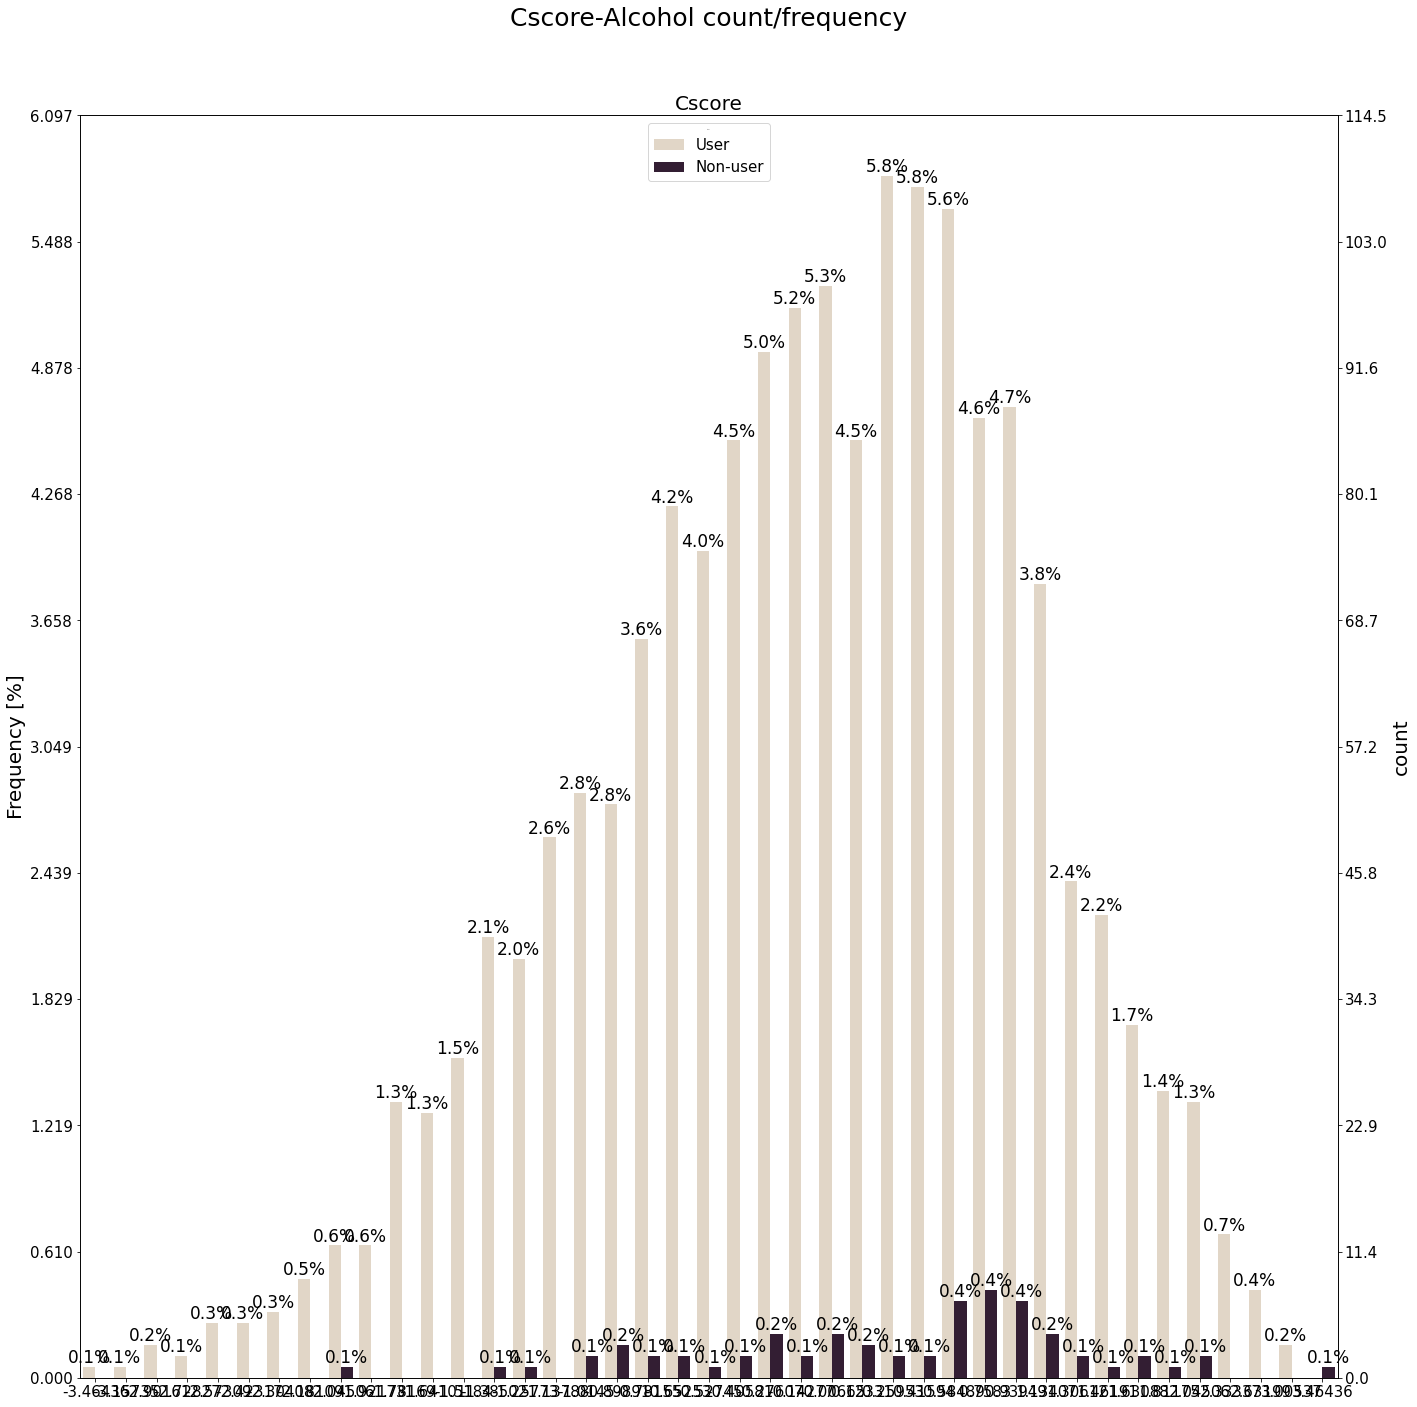

In [28]:
plot("count", drug1, 'Cscore', fig_title="Cscore-Alcohol count/frequency", rotate_label=False, add_args={"hue":"Alcohol", "palette":'ch:.25'}, fontsizes=10);

## Cannabis

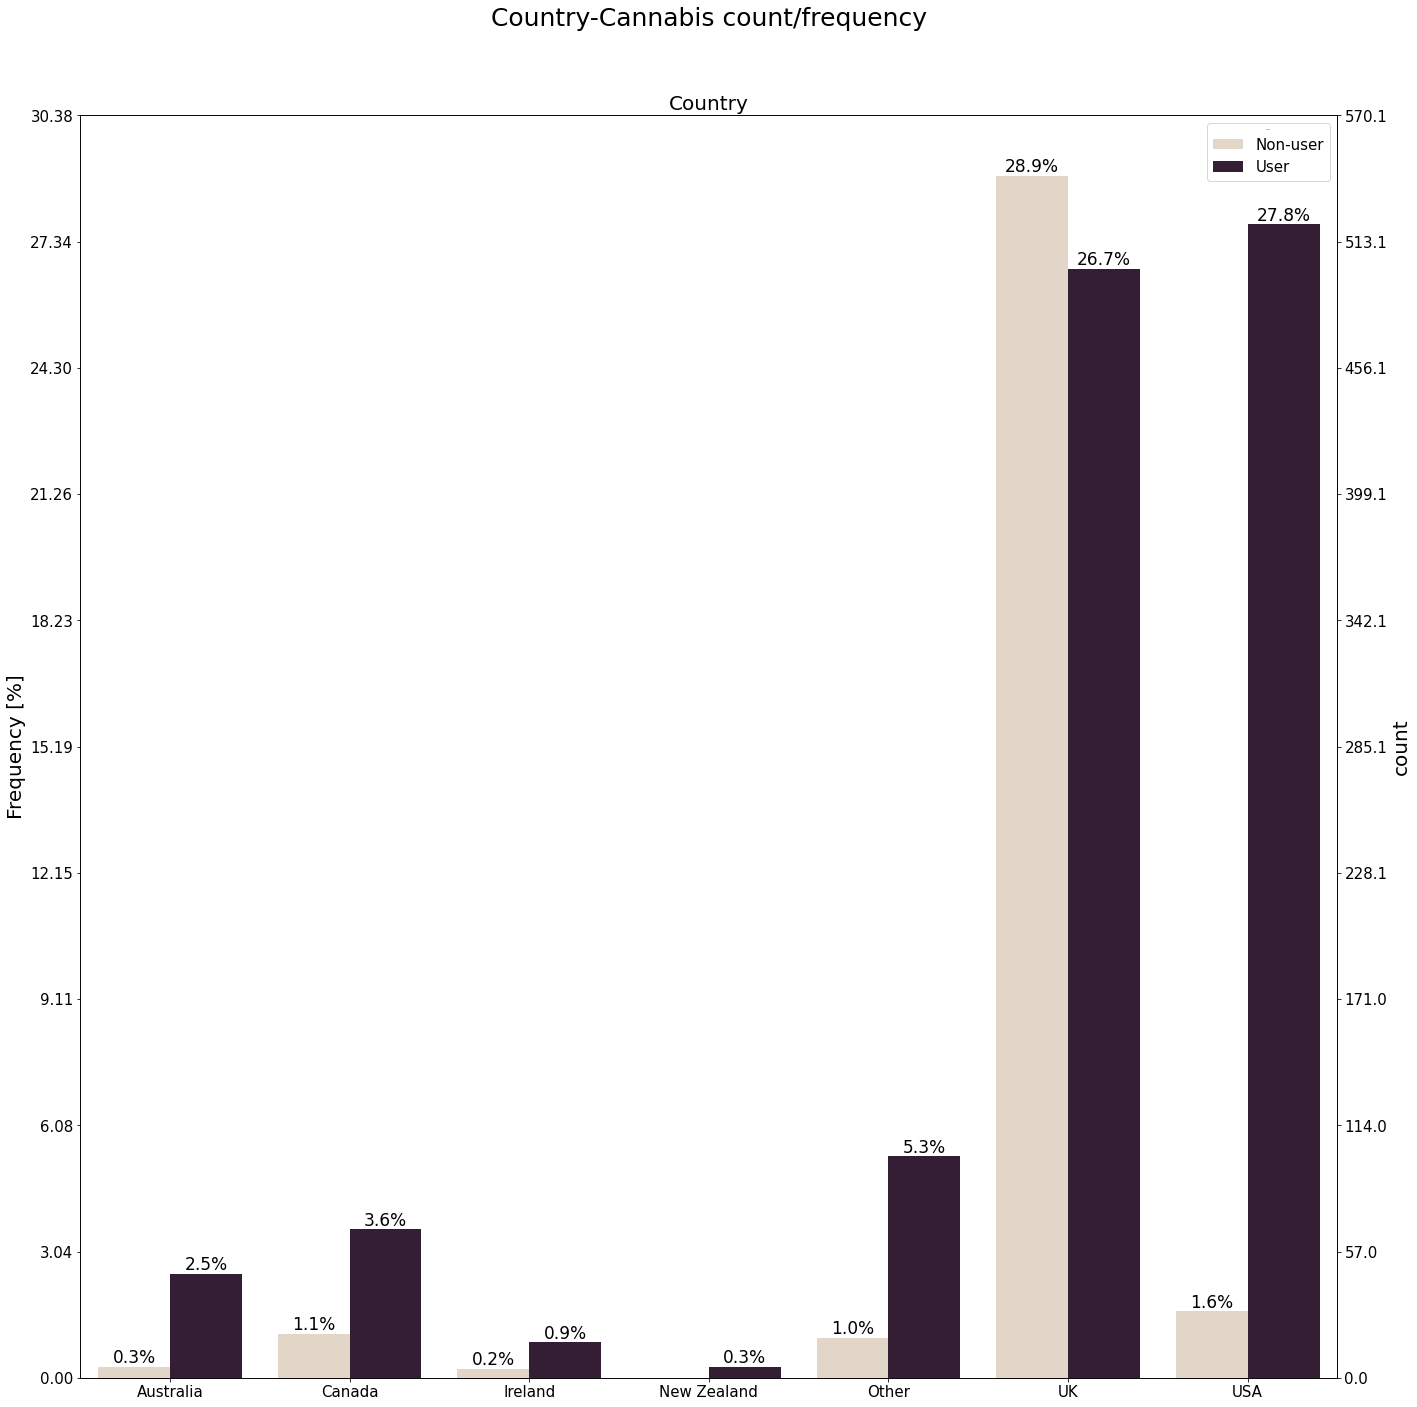

In [33]:
plot("count", drug1, 'Country', fig_title="Country-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

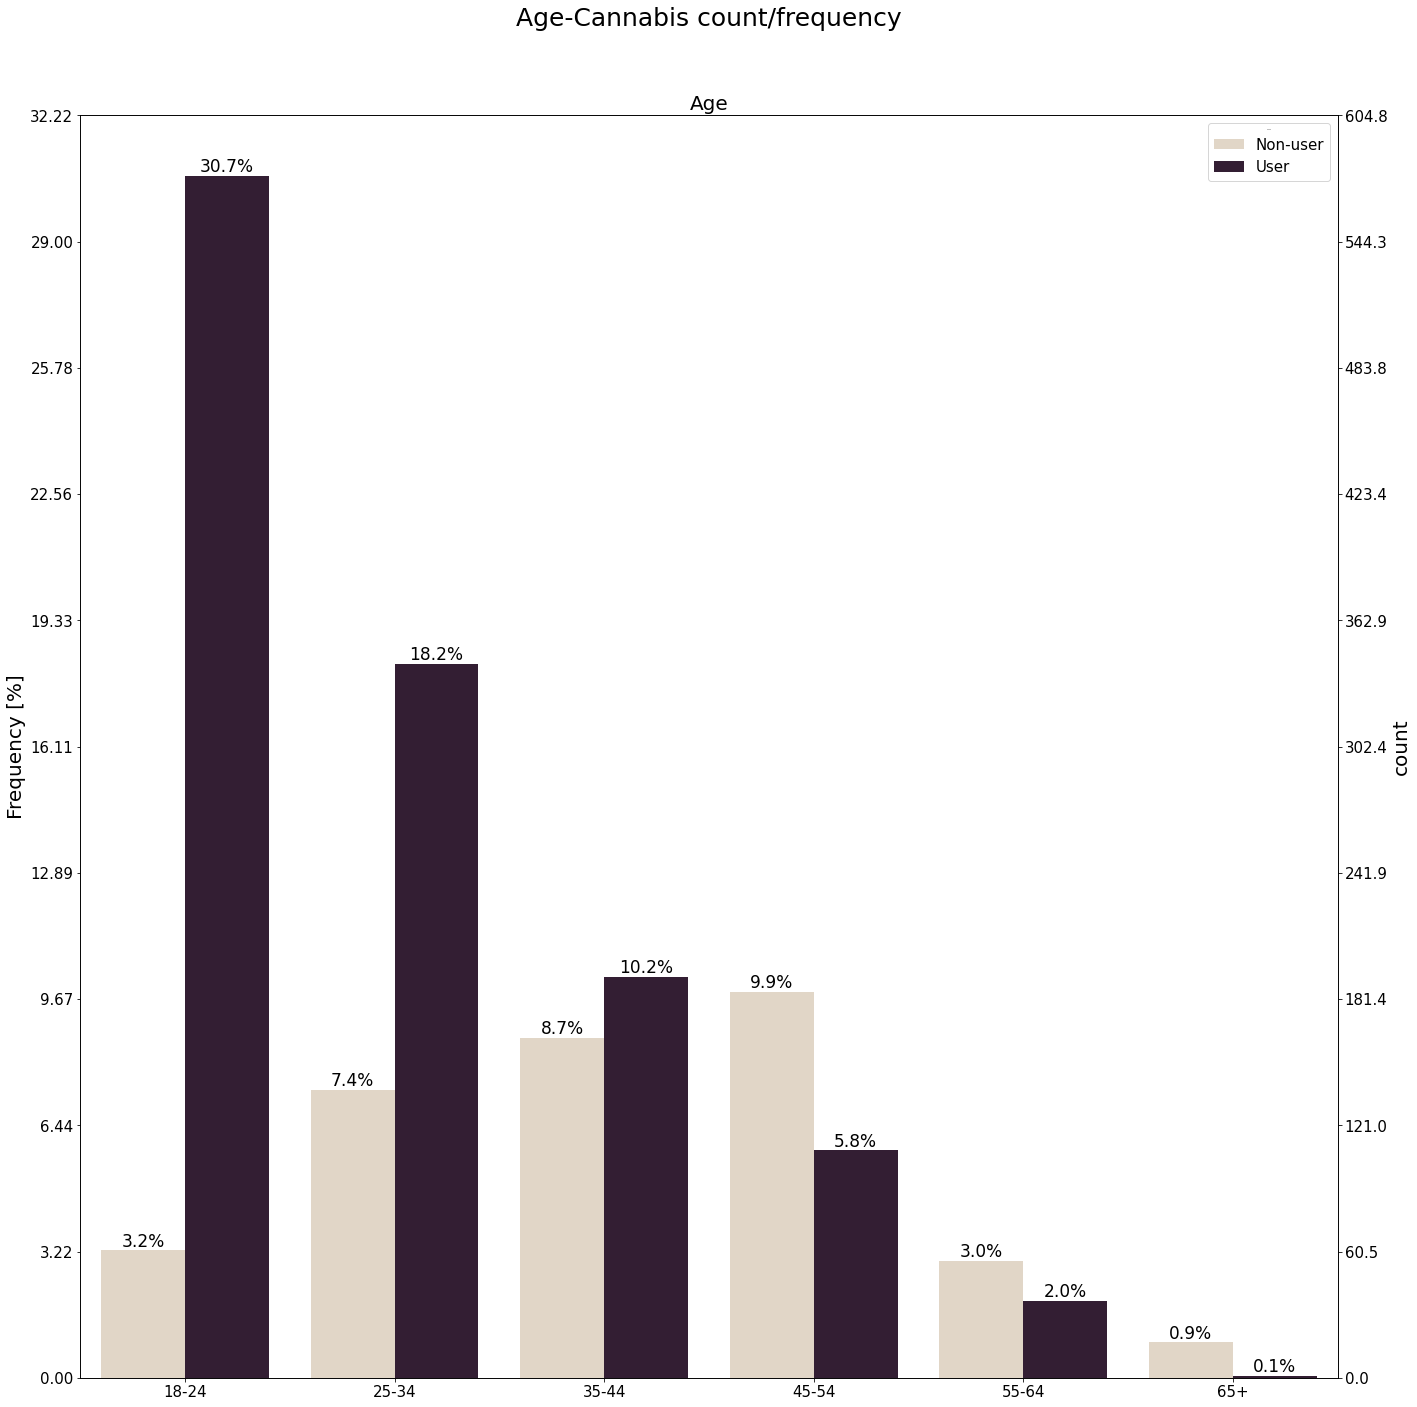

In [34]:
plot("count", drug1, 'Age', fig_title="Age-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

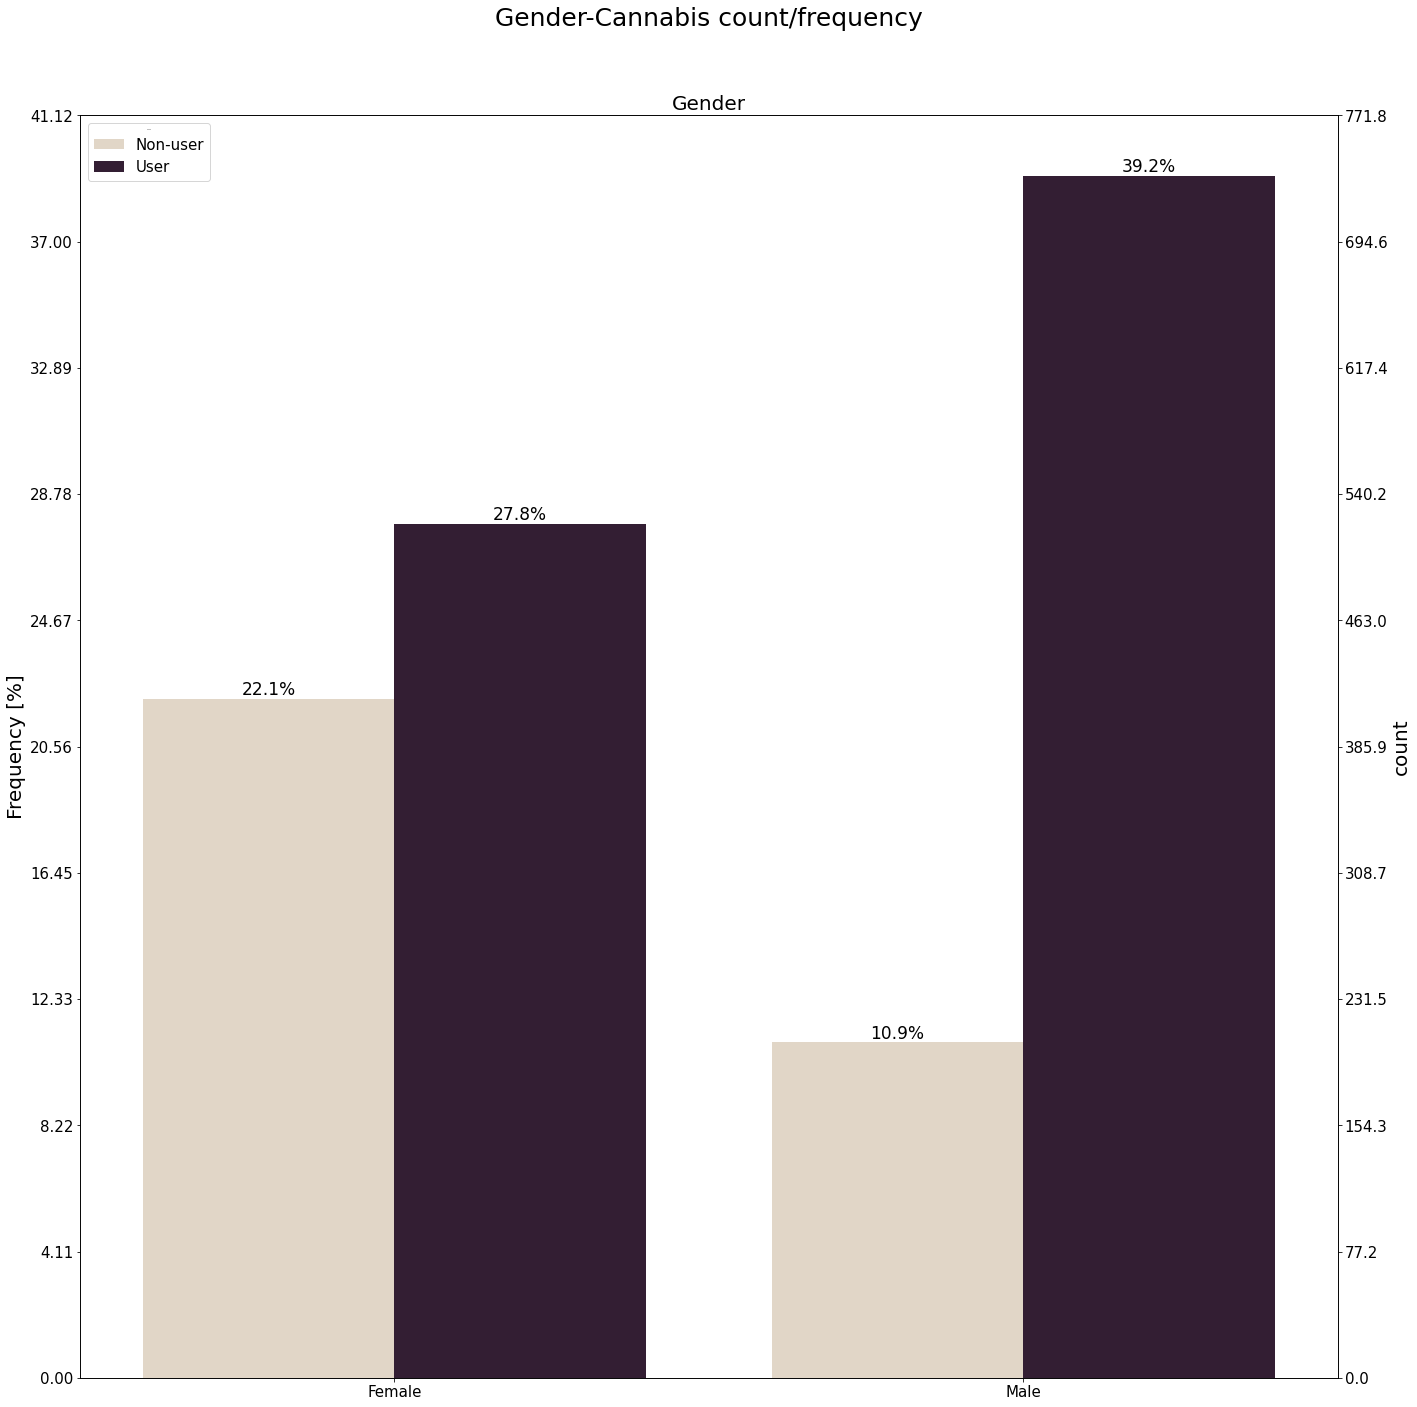

In [35]:
plot("count", drug1, 'Gender', fig_title="Gender-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

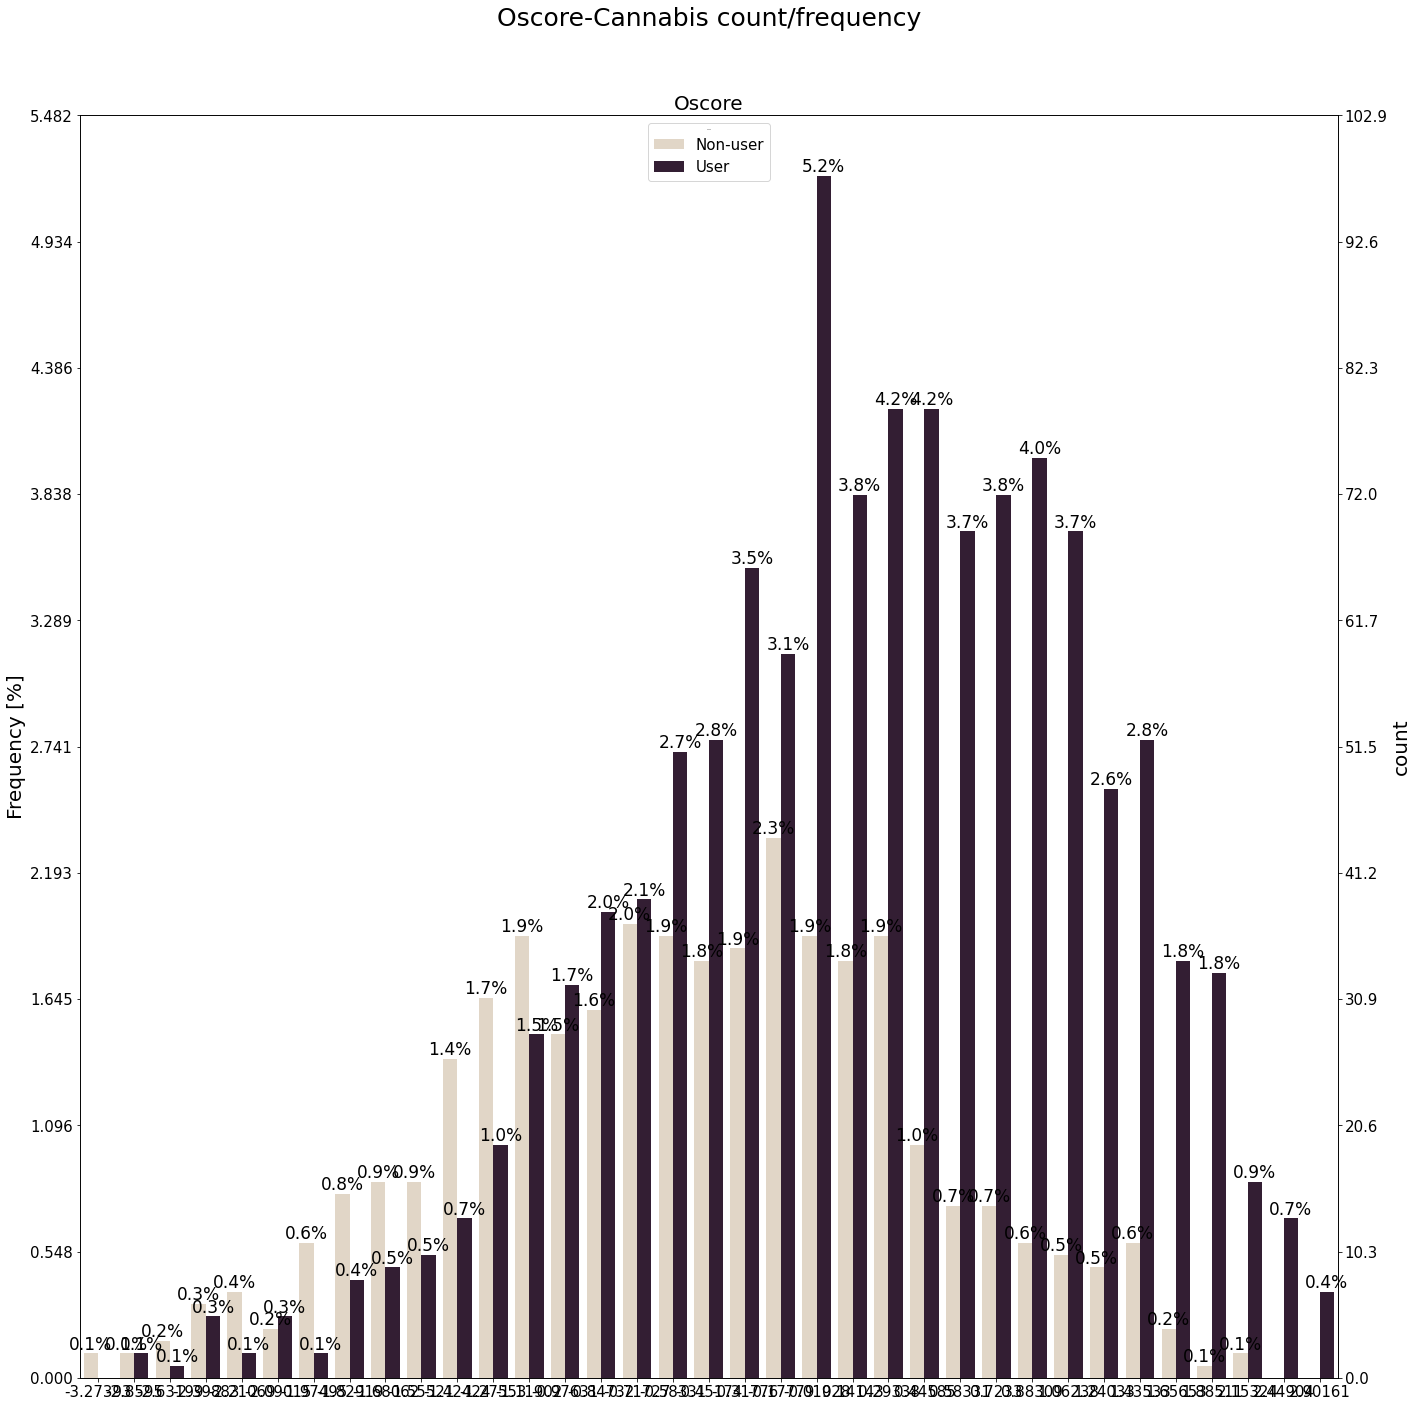

In [36]:
plot("count", drug1, 'Oscore', fig_title="Oscore-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

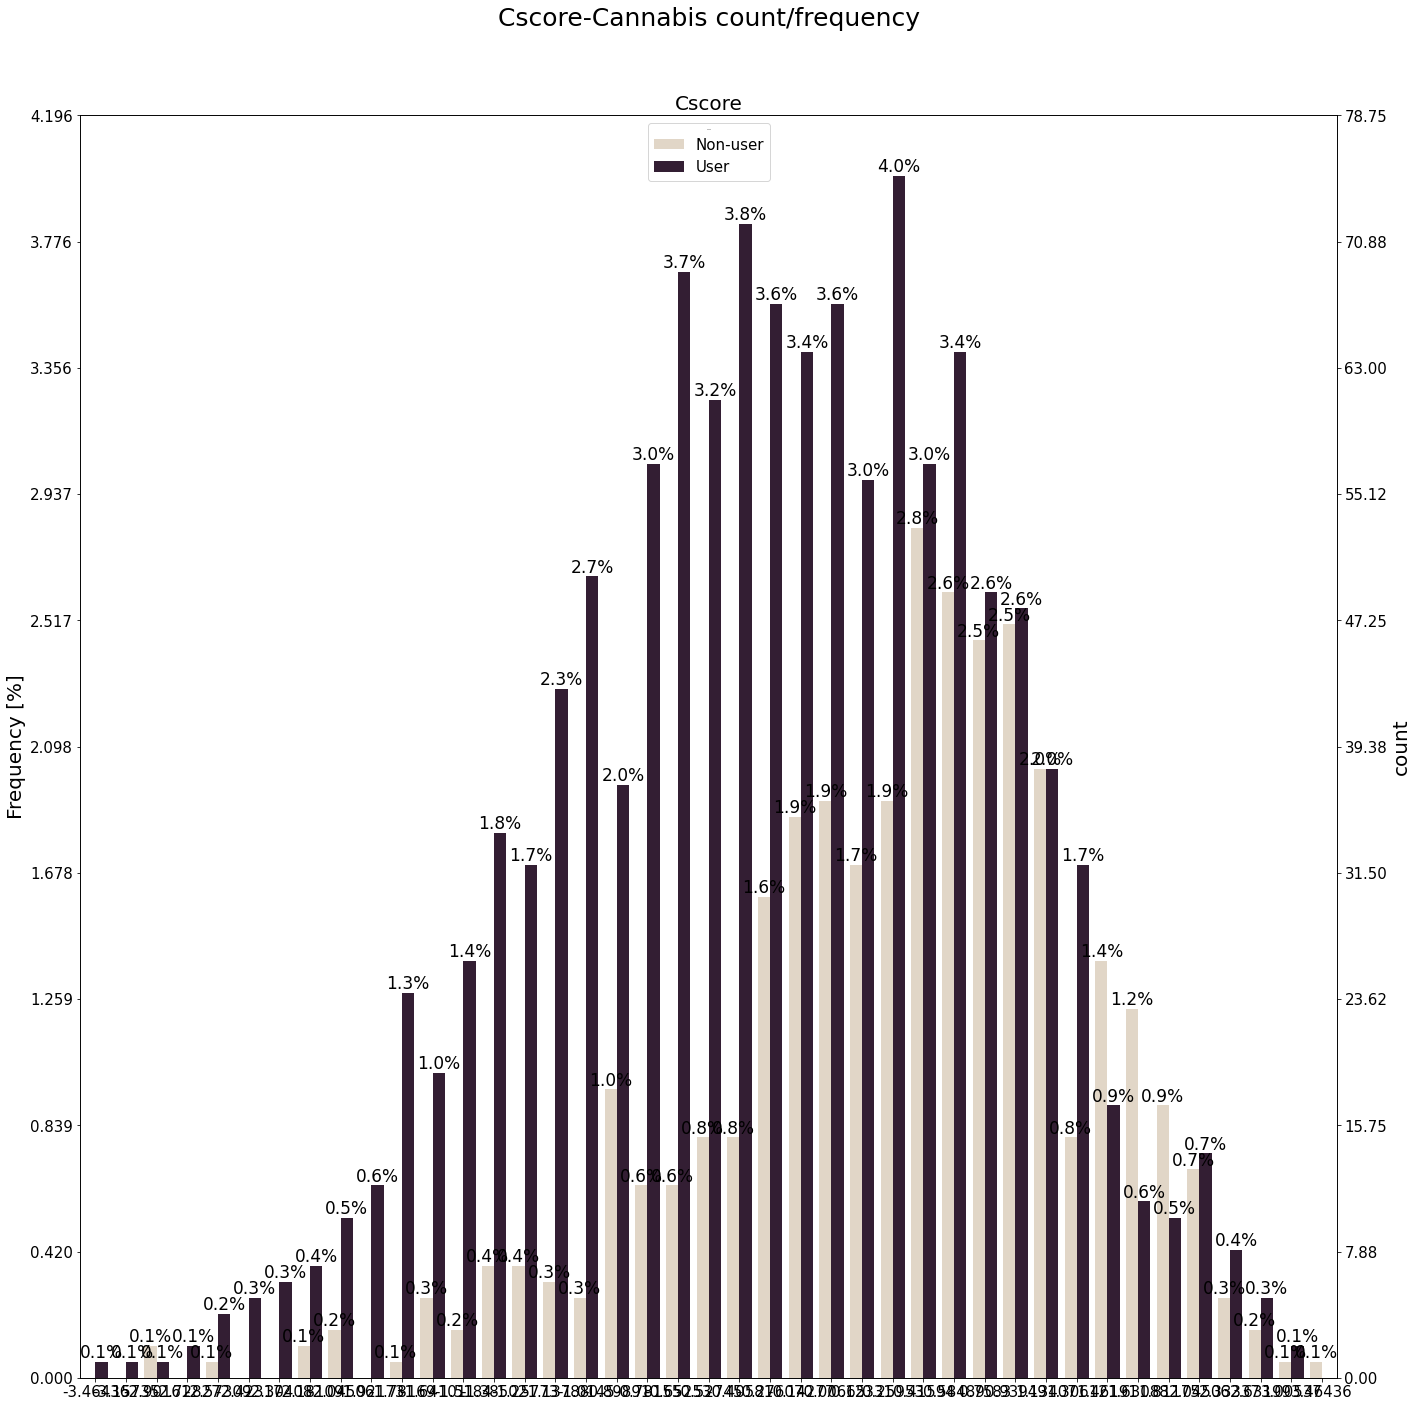

In [37]:
plot("count", drug1, 'Cscore', fig_title="Cscore-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

### Correlation?

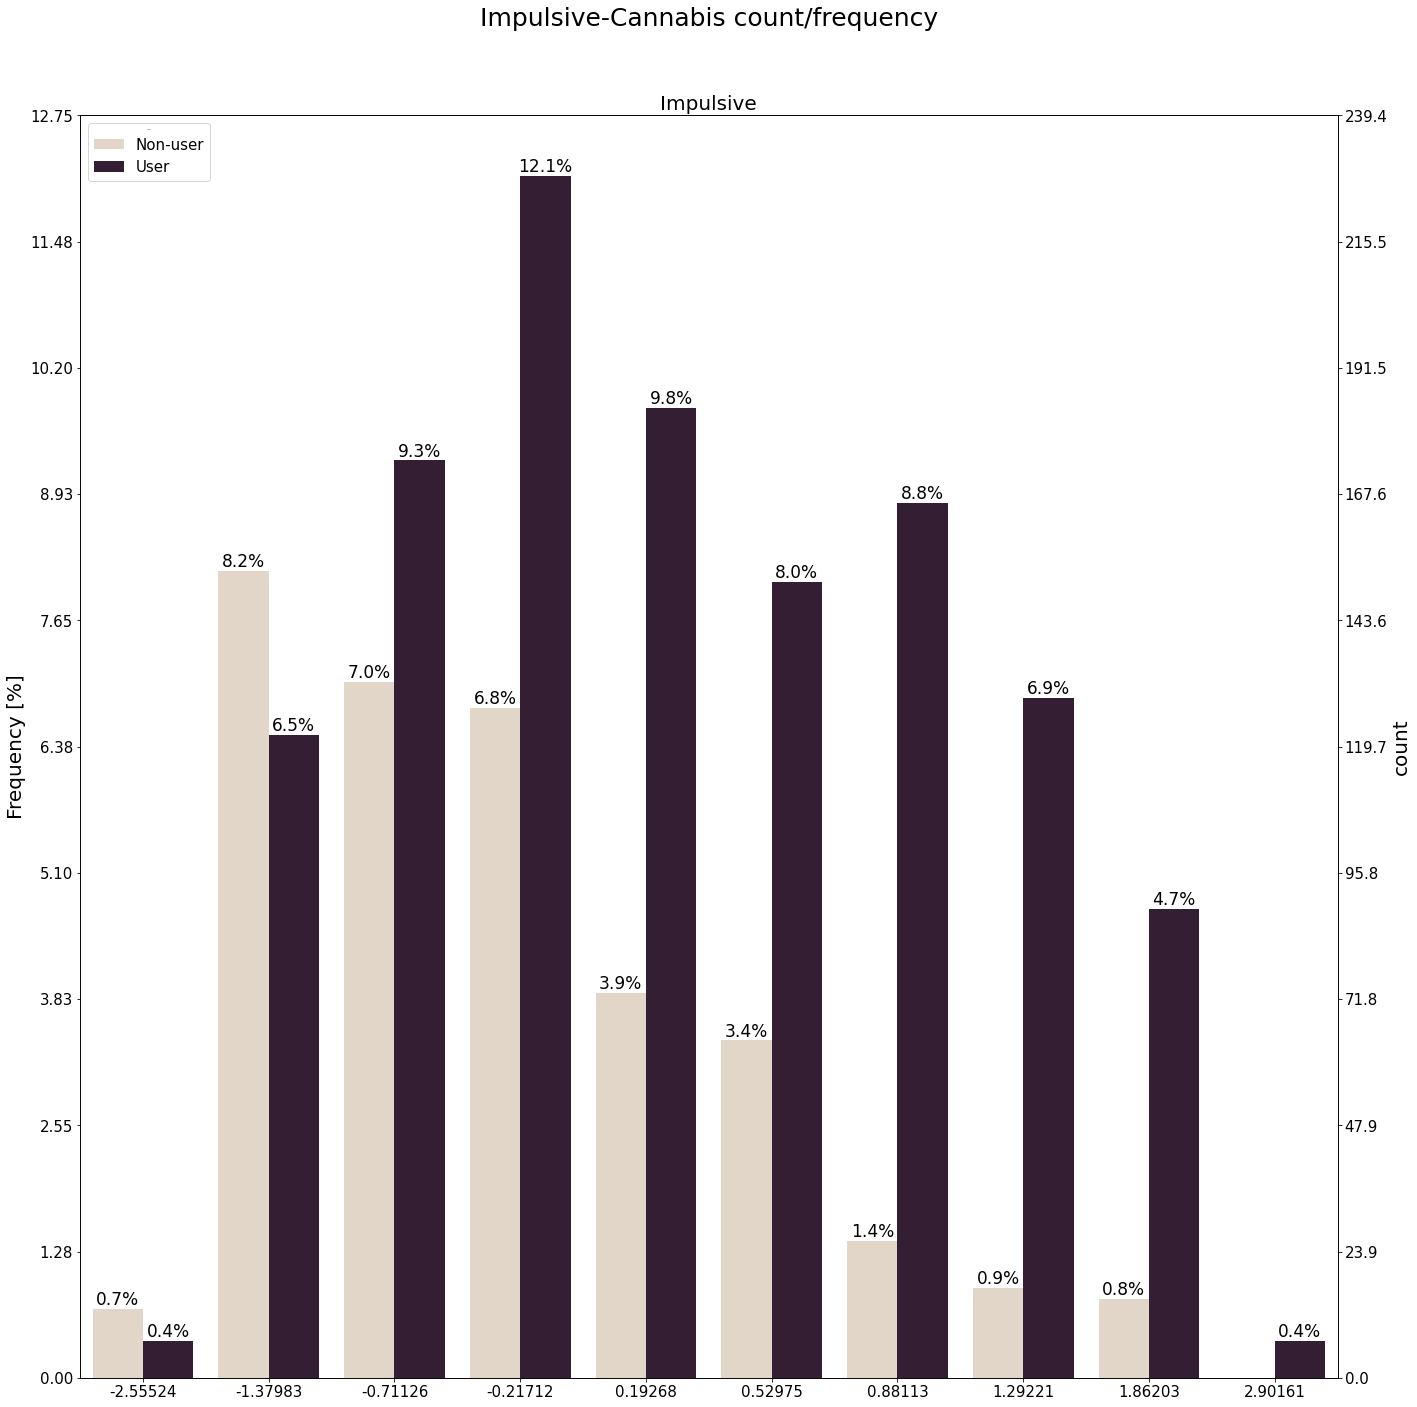

In [42]:
plot("count", drug1, 'Impulsive', fig_title="Impulsive-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

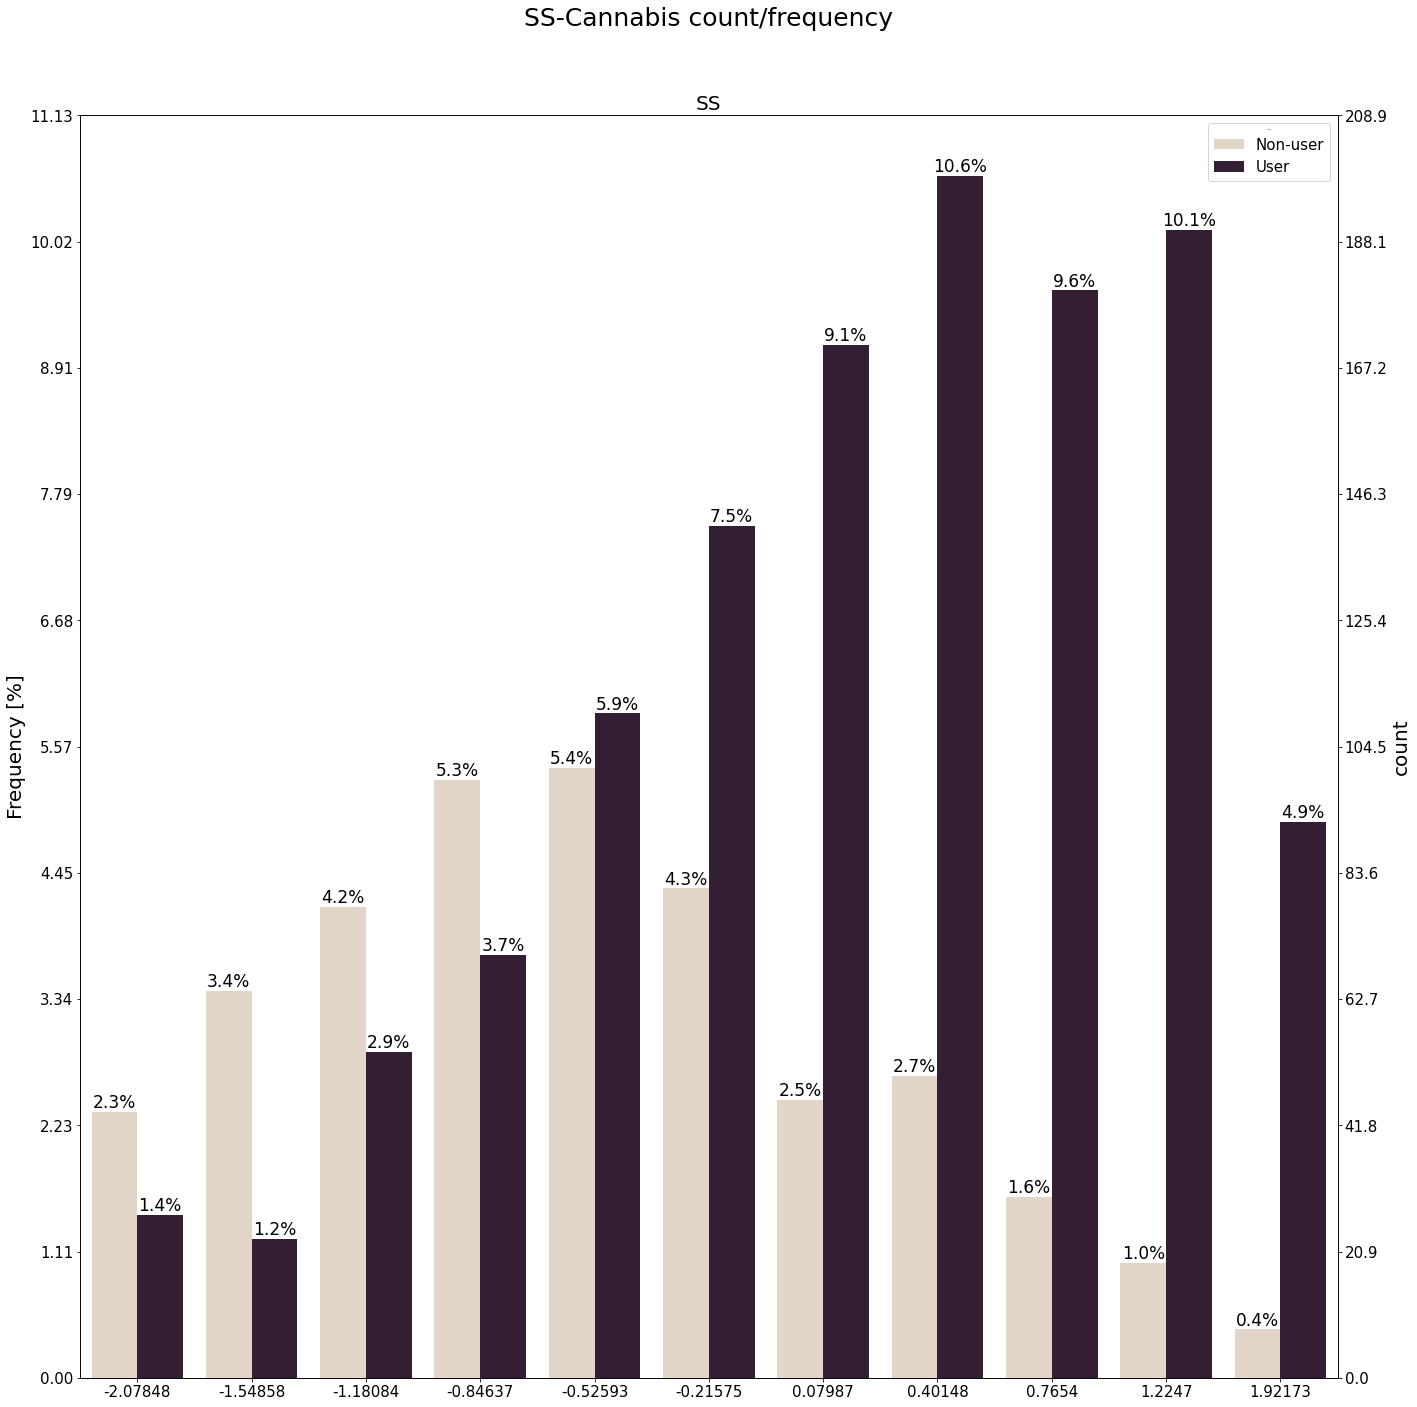

In [43]:
plot("count", drug1, 'SS', fig_title="SS-Cannabis count/frequency", rotate_label=False, add_args={"hue":"Cannabis", "palette":'ch:.25'}, fontsizes=10);

In [38]:
x = drug.iloc[:, 0:12]
y = drug.iloc[:, 15]
z = drug.iloc[:, 22]
drug2 = pd.concat([x,y, z], axis=1)
drug2

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Benzos,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL3,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL0,CL0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL5,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL0,CL0


In [39]:
# 이진 분류

mapping_dict = {'CL0' : 'Non-user',
                'CL1' : 'Non-user',
                'CL2' : 'Non-user',
                'CL3' : 'User',
                'CL4' : 'User',
                'CL5' : 'User',
                'CL6' : 'User'}

for i in range(12,14):
    drug2.iloc[:,i] = drug2.iloc[:,i].apply(lambda x : mapping_dict[x])

In [40]:
drug2

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Benzos,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Non-user,Non-user
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Non-user,Non-user
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Non-user,Non-user
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,User,Non-user
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Non-user,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,Non-user,Non-user
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,Non-user,Non-user
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,User,Non-user
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,Non-user,Non-user


<AxesSubplot:>

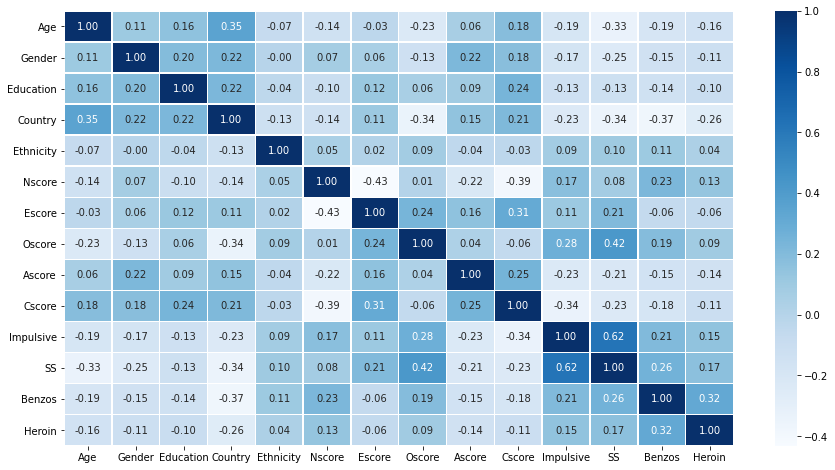

In [41]:
copy2 = drug2.copy()
mapping_dict = {'Non-user' : 0,
                'User' : 1}

for i in range(12,14):
    copy2.iloc[:,i] = copy2.iloc[:,i].apply(lambda x : mapping_dict[x])
plt.figure(figsize=(15,8))
sns.heatmap(data=copy2.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [44]:
age = ['18-24' if a == -0.95197 else 
       '25-34' if a == -0.07854 else 
       '35-44' if a == 0.49788 else  
       '45-54' if a == 1.09449 else  
       '55-64' if a == 1.82213 else  
       '65+' 
       for a in drug2['Age']]



gender = ['Female' if g > 0 else 
			'Male' 
			for g in drug2['Gender']]


education  = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in drug2['Education']]


country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in drug2['Country']]


ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in drug2['Ethnicity']]


drug2['Age'] = age
drug2['Gender'] = gender
drug2['Education'] = education
drug2['Country'] = country
drug2['Ethnicity'] = ethnicity

In [45]:
drug2

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Benzos,Heroin
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Non-user,Non-user
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Non-user,Non-user
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Non-user,Non-user
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,User,Non-user
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Non-user,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,Non-user,Non-user
1881,18-24,Male,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,Non-user,Non-user
1882,25-34,Female,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,User,Non-user
1883,18-24,Female,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,Non-user,Non-user


## Benzos

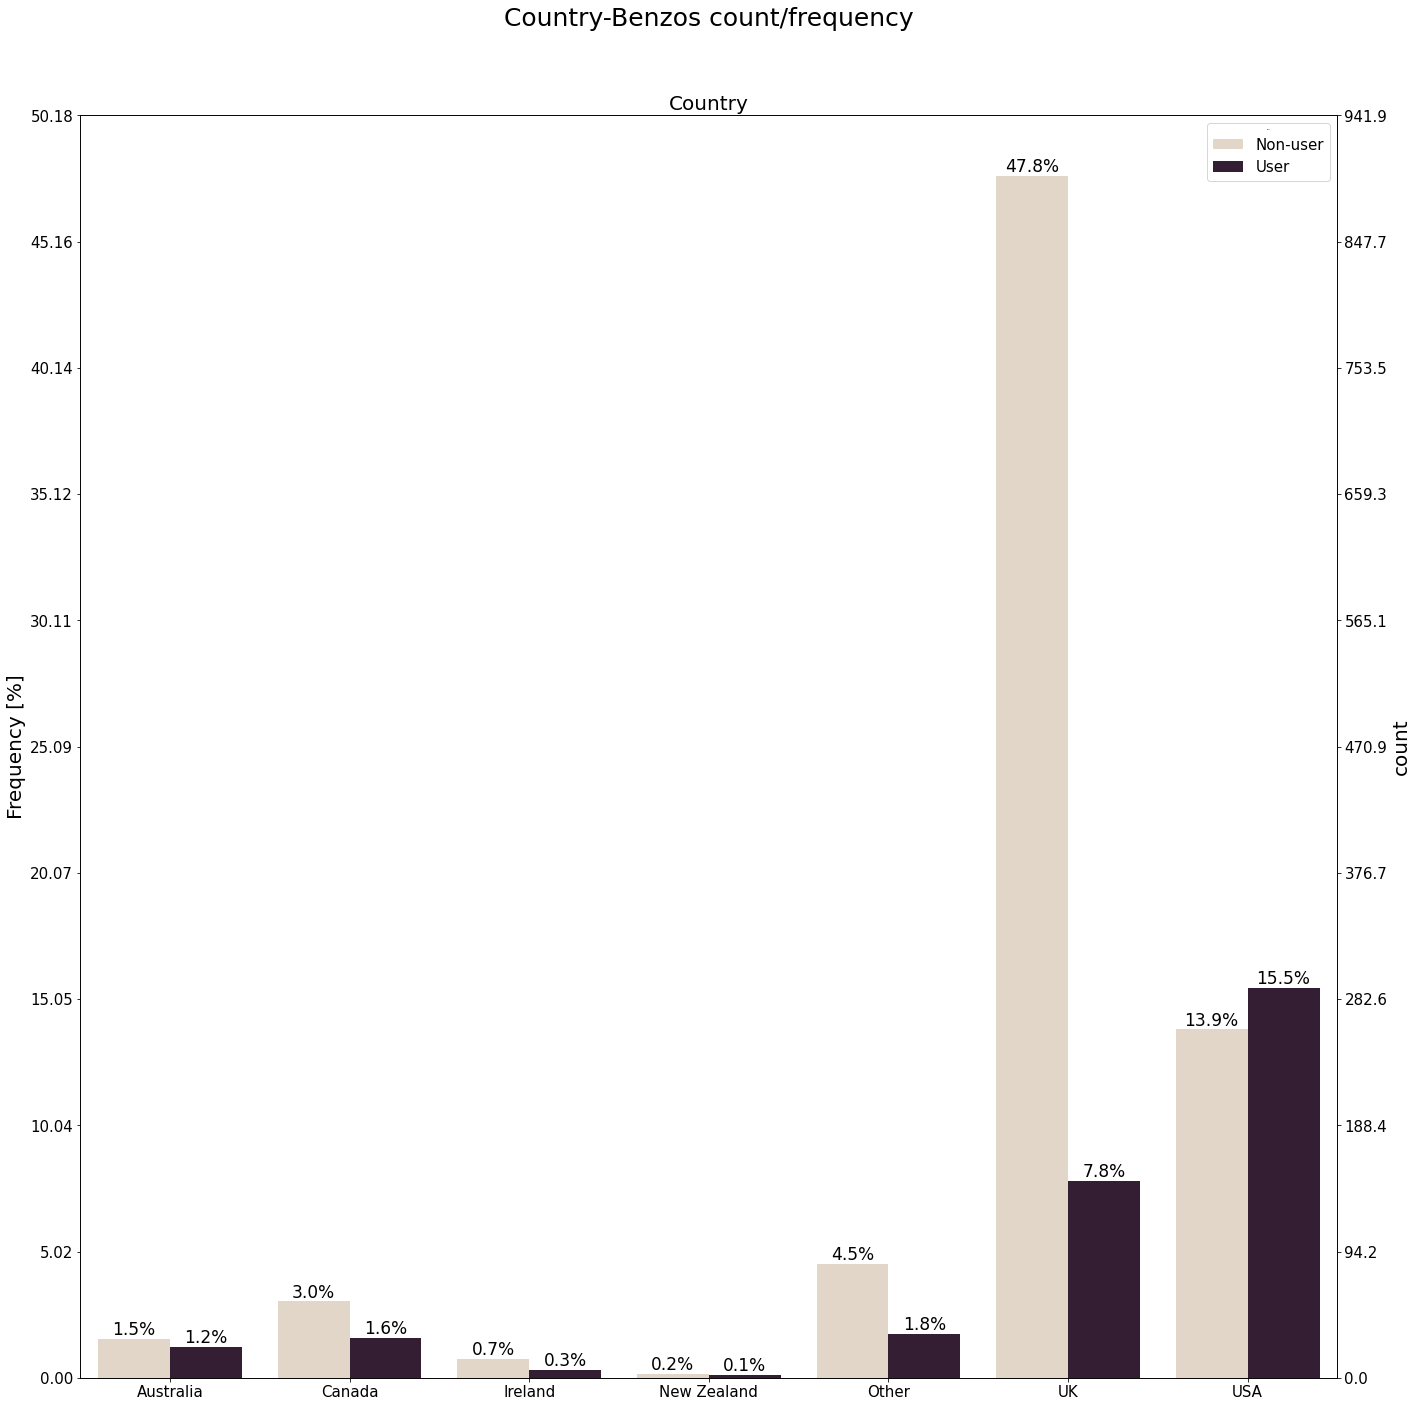

In [46]:
plot("count", drug2, 'Country', fig_title="Country-Benzos count/frequency", rotate_label=False, add_args={"hue":"Benzos", "palette":'ch:.25'}, fontsizes=10);

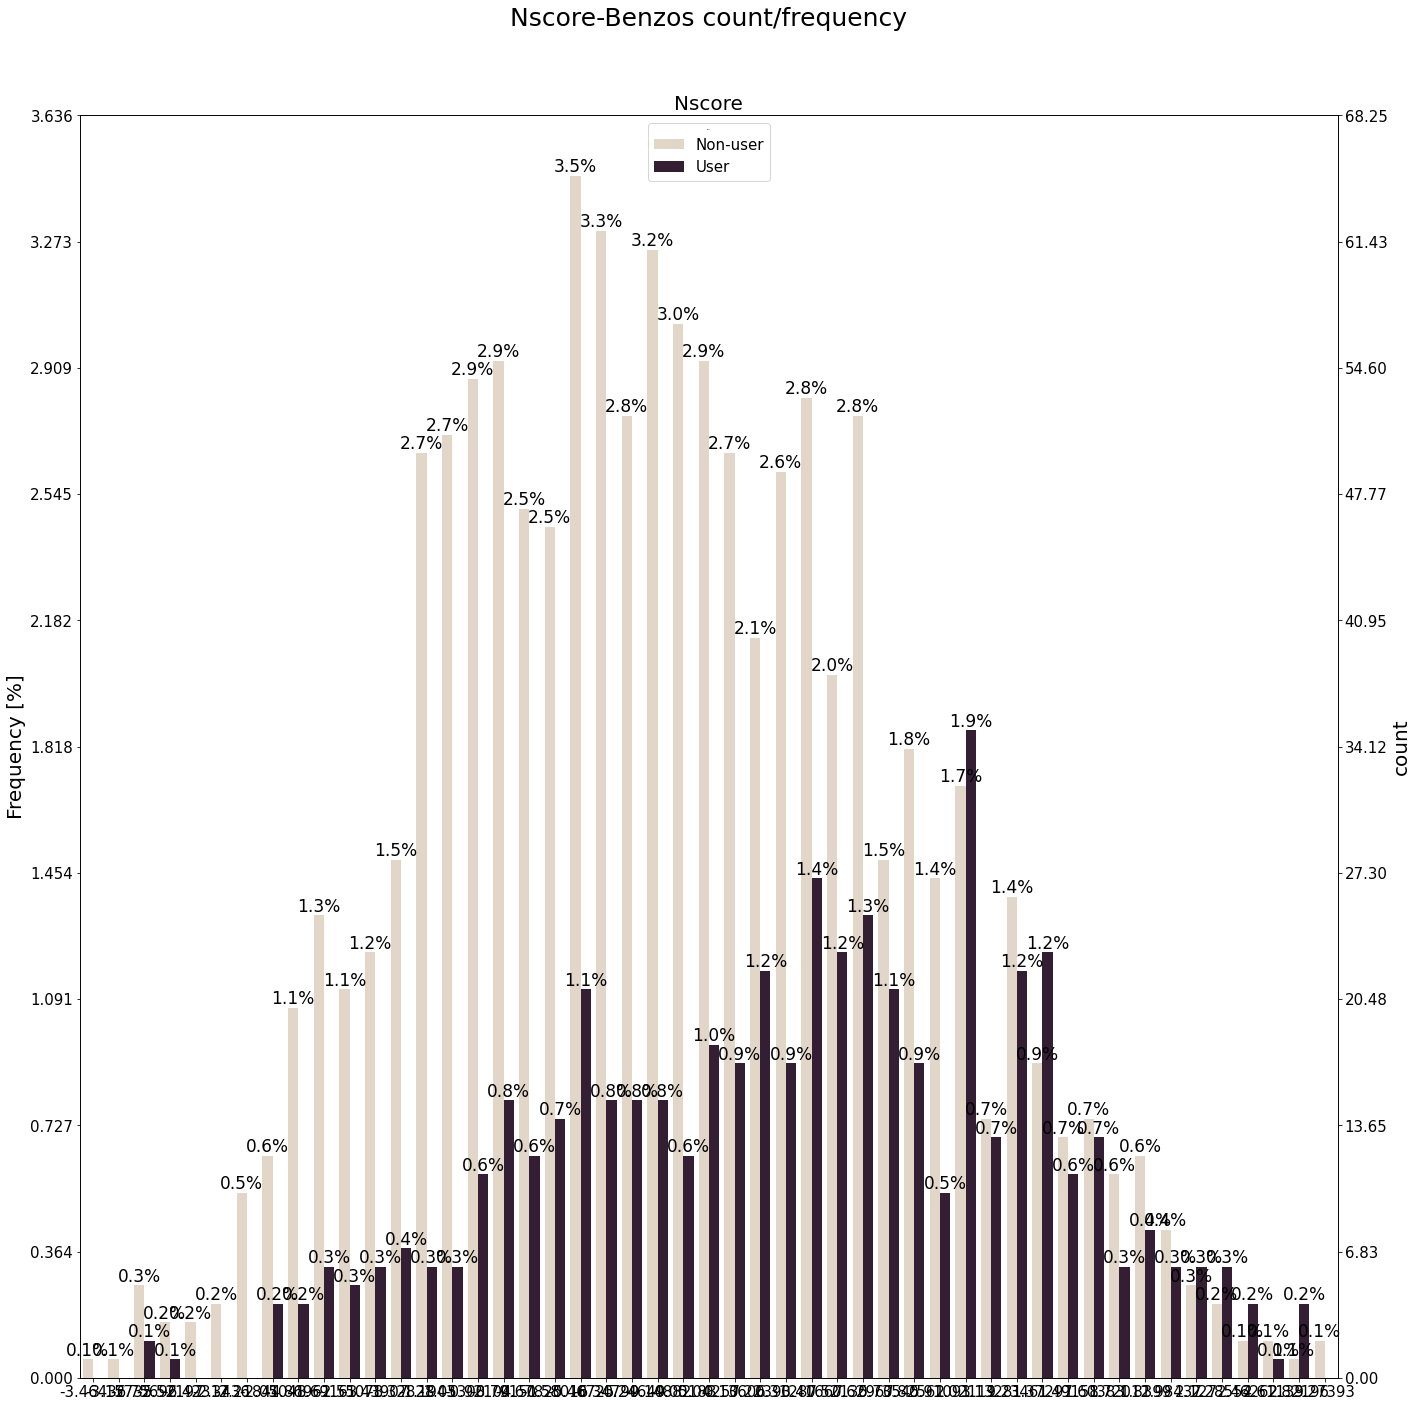

In [47]:
plot("count", drug2, 'Nscore', fig_title="Nscore-Benzos count/frequency", rotate_label=False, add_args={"hue":"Benzos", "palette":'ch:.25'}, fontsizes=10);

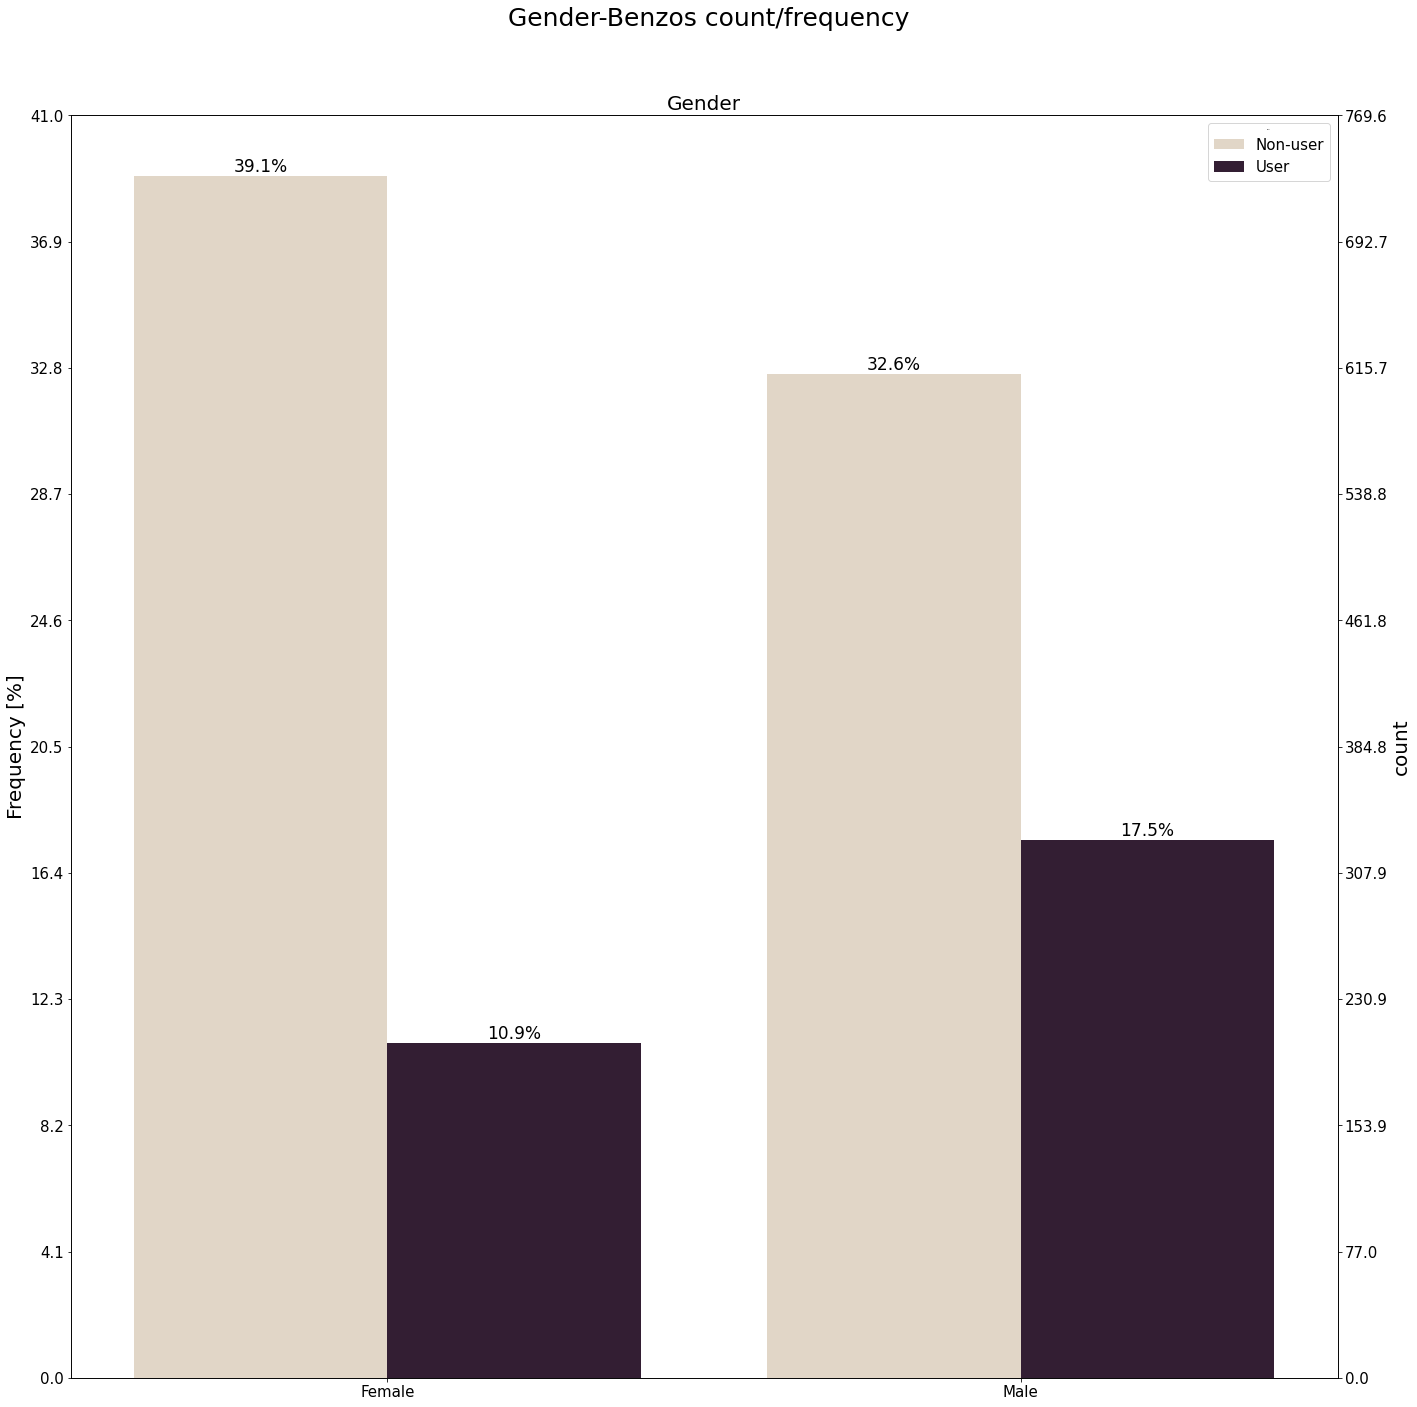

In [48]:
plot("count", drug2, 'Gender', fig_title="Gender-Benzos count/frequency", rotate_label=False, add_args={"hue":"Benzos", "palette":'ch:.25'}, fontsizes=10);

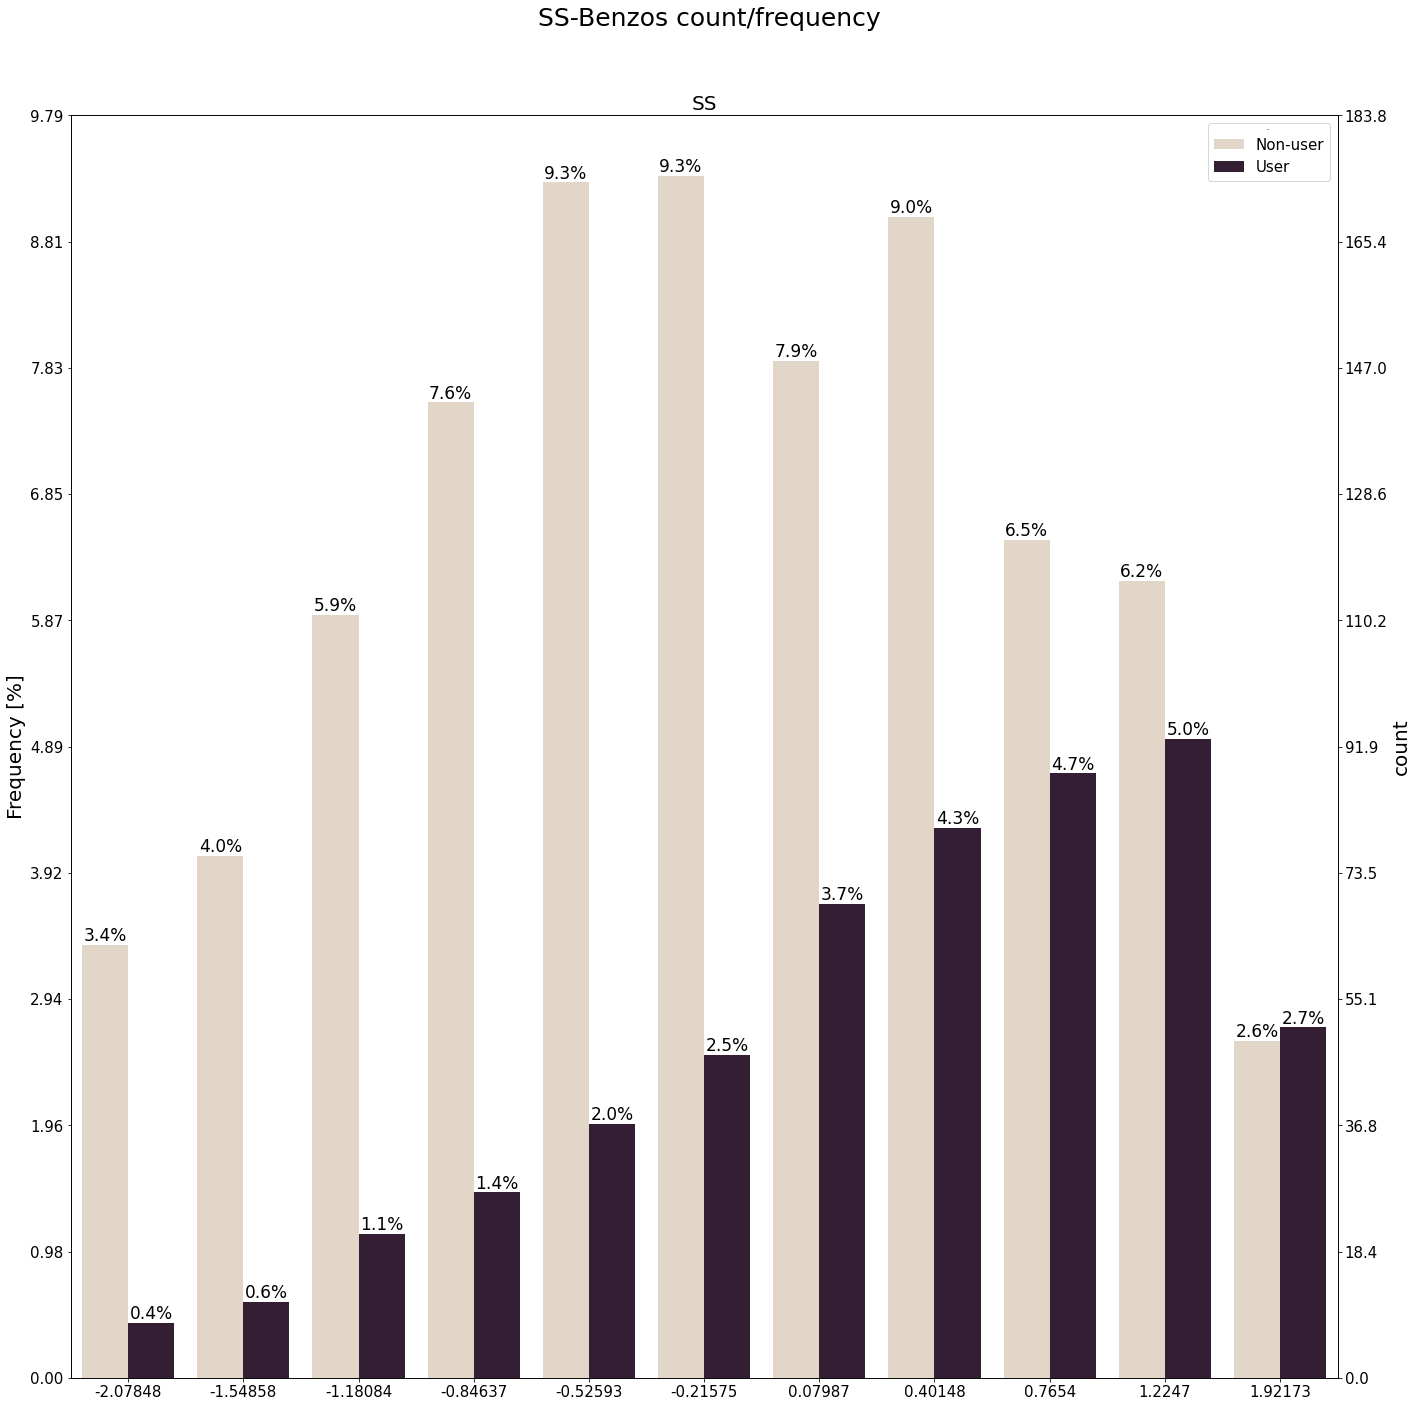

In [50]:
plot("count", drug2, 'SS', fig_title="SS-Benzos count/frequency", rotate_label=False, add_args={"hue":"Benzos", "palette":'ch:.25'}, fontsizes=10);

## Heroin

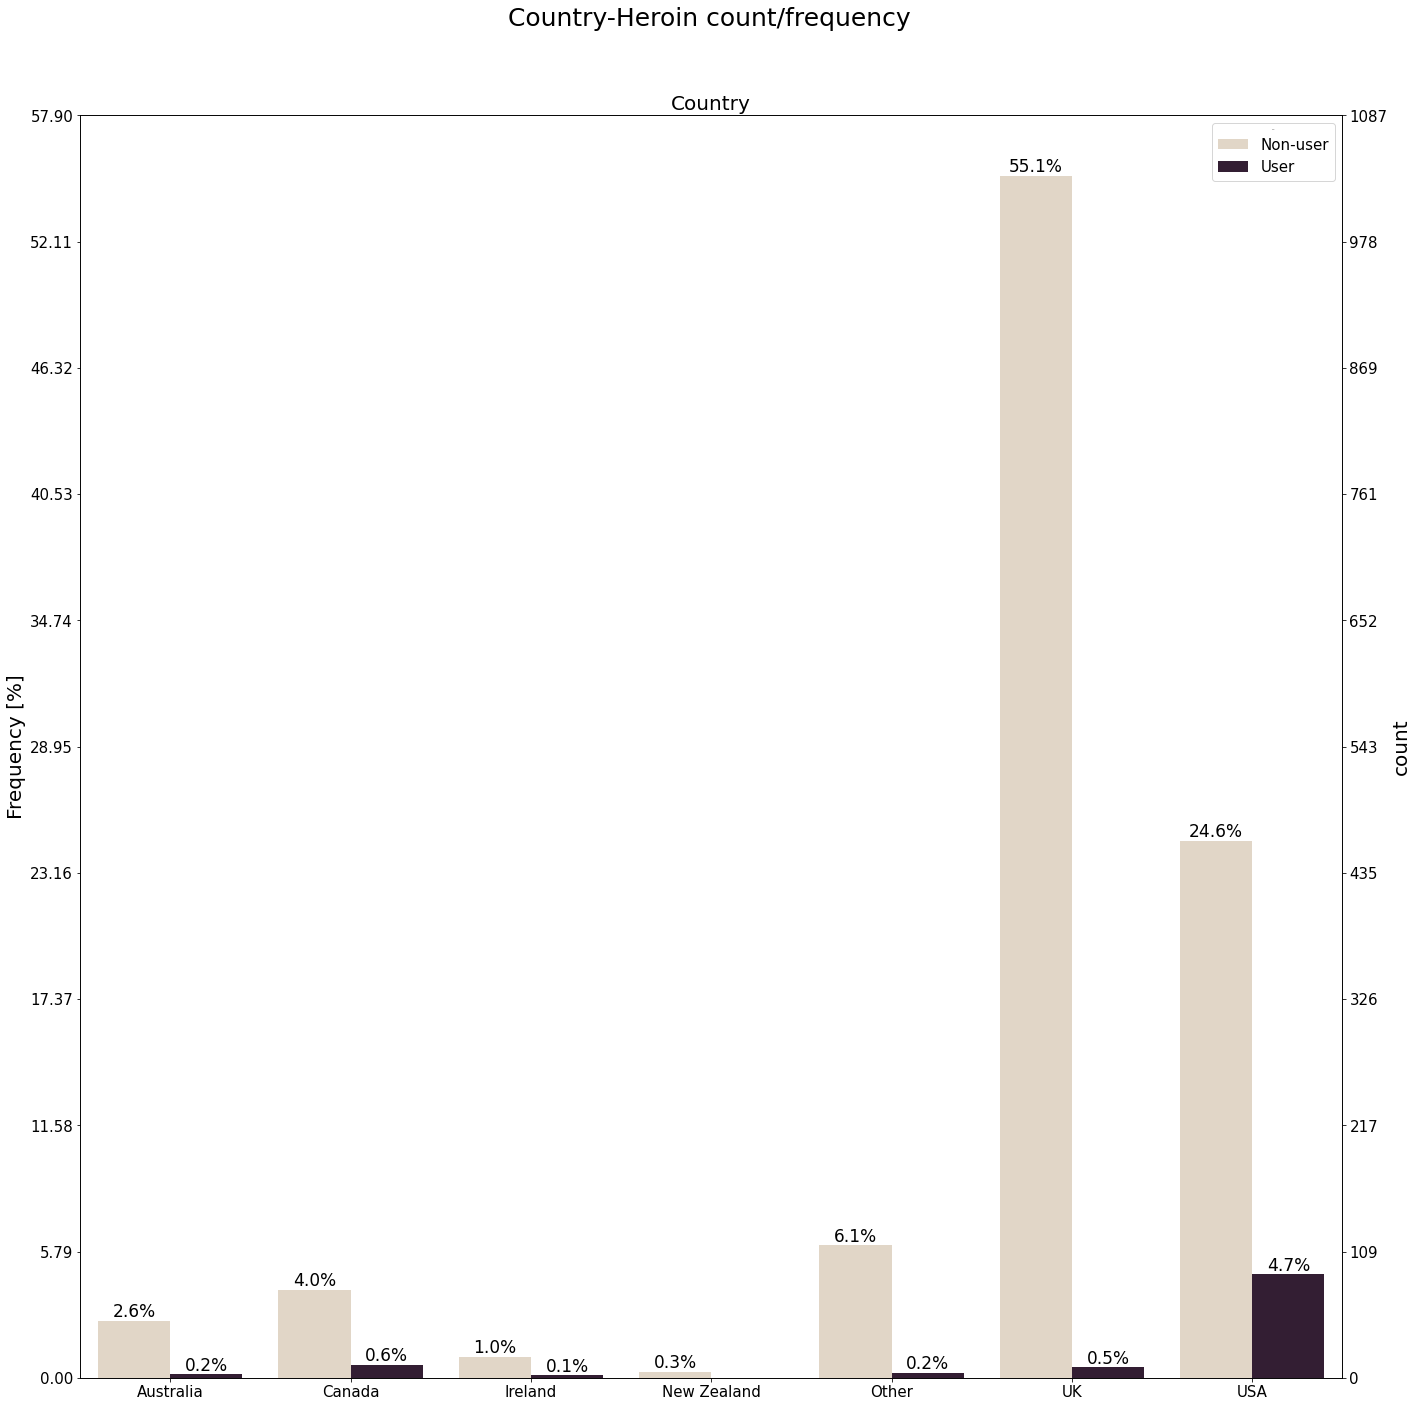

In [51]:
plot("count", drug2, 'Country', fig_title="Country-Heroin count/frequency", rotate_label=False, add_args={"hue":"Heroin", "palette":'ch:.25'}, fontsizes=10);

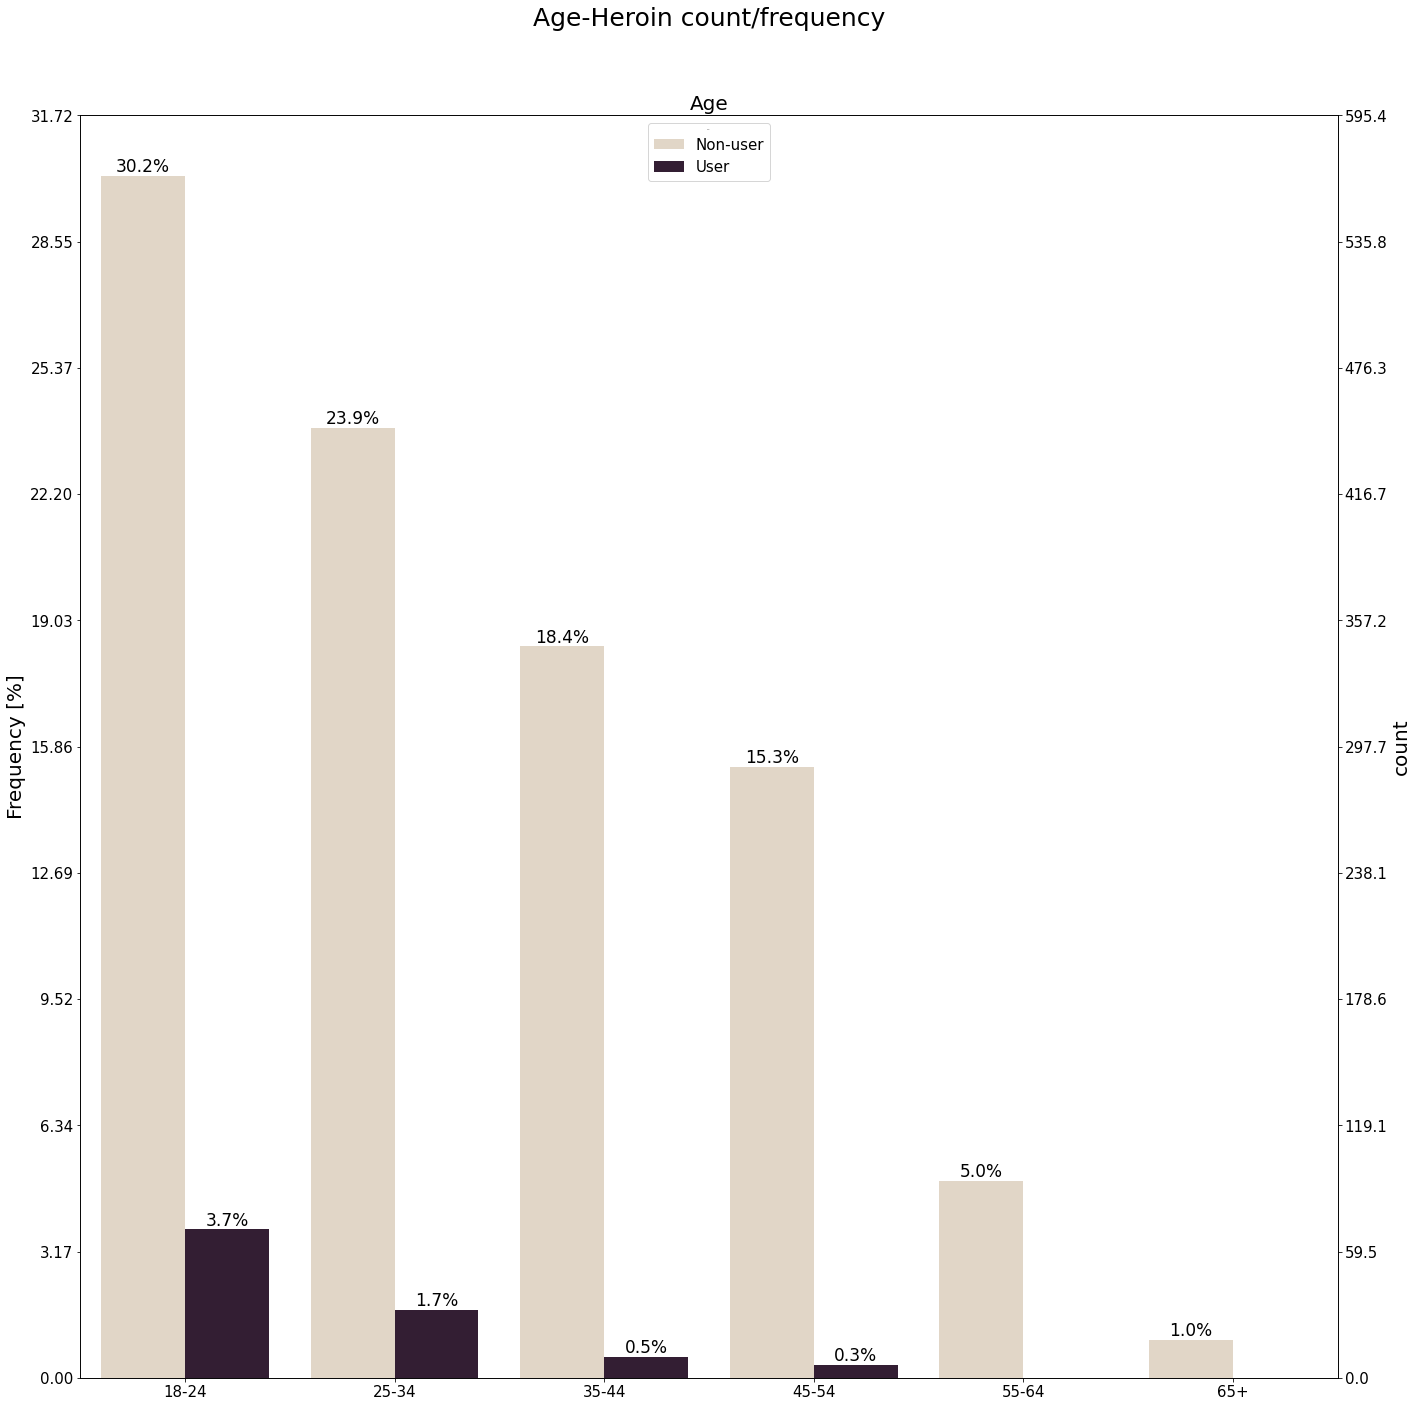

In [52]:
plot("count", drug2, 'Age', fig_title="Age-Heroin count/frequency", rotate_label=False, add_args={"hue":"Heroin", "palette":'ch:.25'}, fontsizes=10);

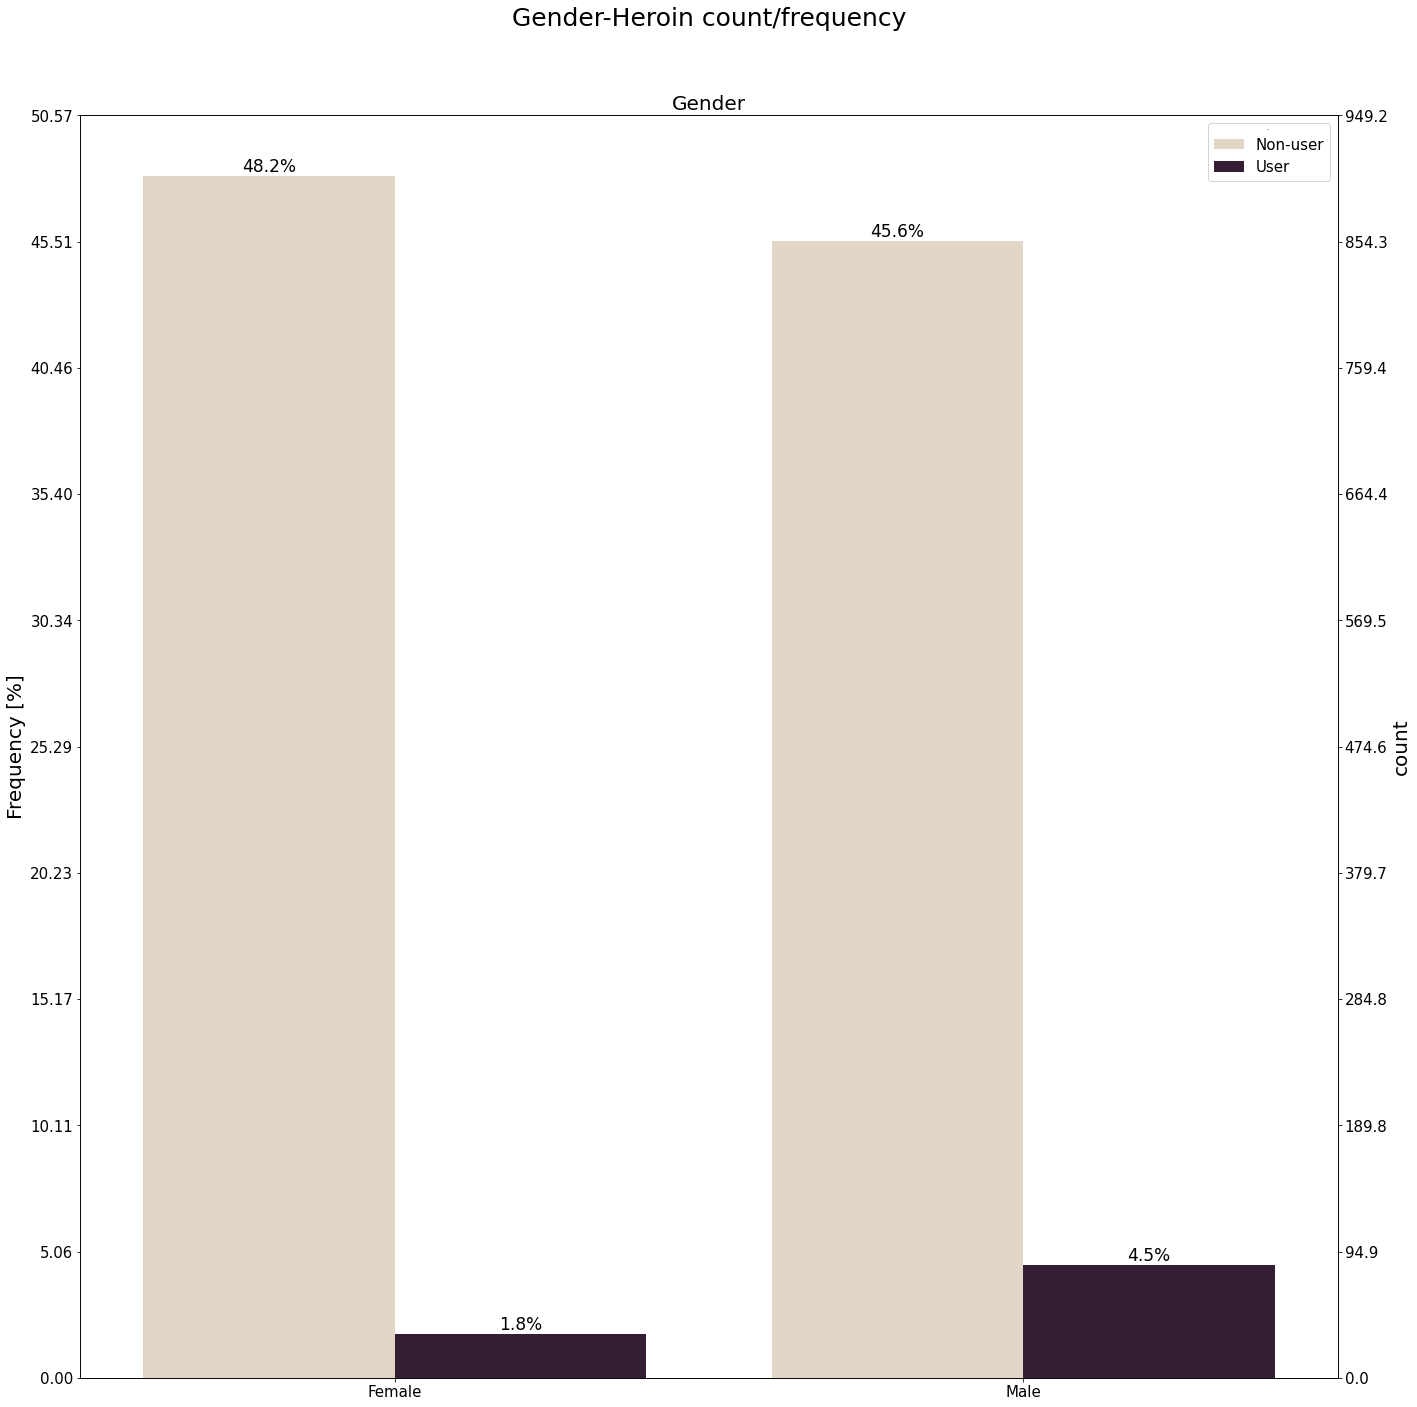

In [53]:
plot("count", drug2, 'Gender', fig_title="Gender-Heroin count/frequency", rotate_label=False, add_args={"hue":"Heroin", "palette":'ch:.25'}, fontsizes=10);

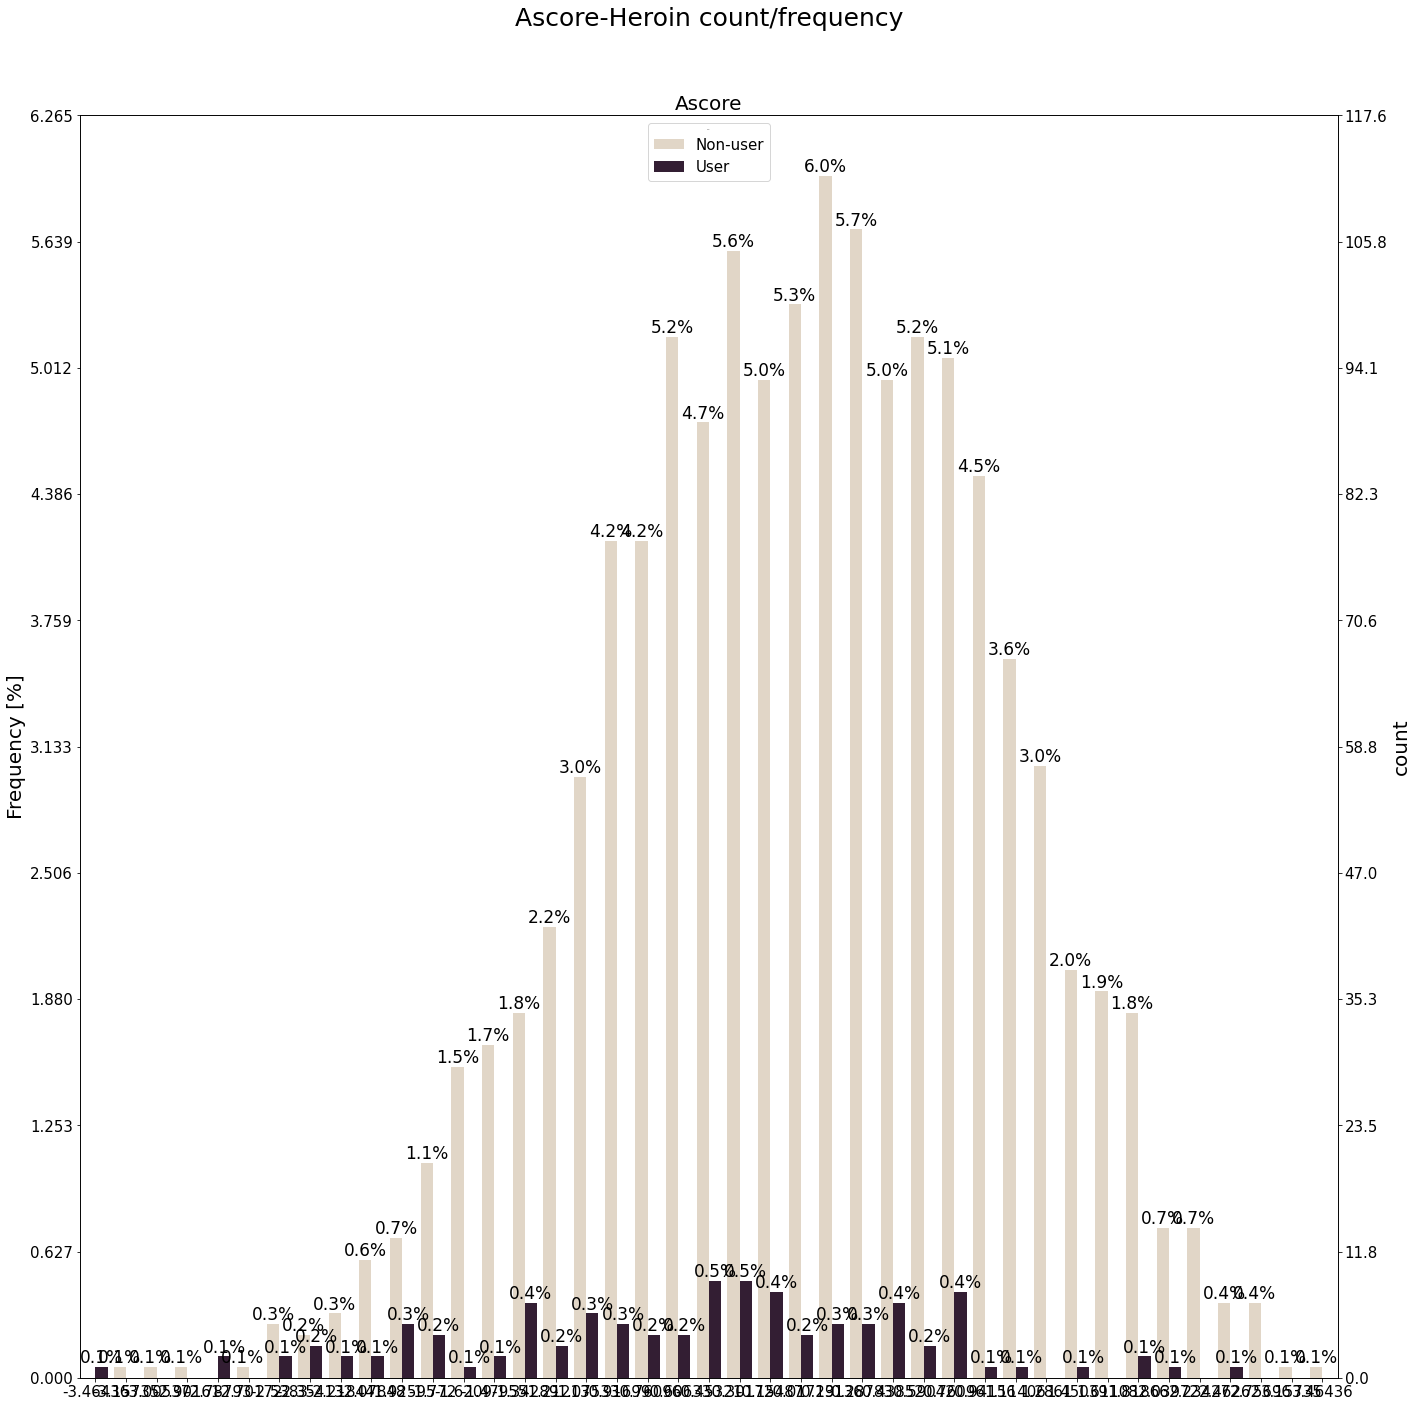

In [54]:
plot("count", drug2, 'Ascore', fig_title="Ascore-Heroin count/frequency", rotate_label=False, add_args={"hue":"Heroin", "palette":'ch:.25'}, fontsizes=10);